# NLP 2025
# Lab 2: Word Vectors and Information Retrieval

During the first few weeks, we discussed various ways to represent text 📝. One key question was: What should be the basic unit of representation? Words are the fundamental building blocks 🧱.

In this lab, we will explore different text representation models, such as Bag-of-Words (BoW), TF-IDF and word embeddings 🔤➡️🔢. Among these, word embeddings are the most effective in terms of performance. They represent each word as a vector of numbers, where each vector captures the meaning of the word 🧠📊.

These numerical representations (or weights) are learned using machine learning models 🤖. We’ll dive deeper into how these vectors are learned in the next lecture 📚.

For now, we’ll focus on how different representation methods affect performance in an information retrieval task 🔍.

By the end of this lab, you should be able to:

+ 🧼🔁 Implement and/or use built-in functions to preprocess your data (once again!)
+ 🧱👜 Build a Bag-of-Words representation of the dataset
+ 📊✨ Implement TF-IDF
+ 📥🔤 Load pre-trained word embeddings
+ 🔍🧠 Inspect and test word embedding properties
+ 🗣️➡️📐 Use word embeddings to get sentence representations (aka sentence embeddings)
+ 🧩🔎 Use sentence embeddings to solve more complex tasks like information retrieval
+ 🧪📏 Design evaluation frameworks for specific NLP tasks and assess their difficulty

### Score breakdown

| Exercise            | Points |
|---------------------|--------|
| [Exercise 1](#e1)   | 1      |
| [Exercise 2](#e2)   | 1      |
| [Exercise 3](#e3)   | 1      |
| [Exercise 4](#e4)   | 1      |
| [Exercise 5](#e5)   | 1      |
| [Exercise 6](#e6)   | 2      |
| [Exercise 7](#e7)   | 10     |
| [Exercise 8](#e8)   | 5      |
| [Exercise 9](#e9)   | 15     |
| [Exercise 10](#e10) | 10     |
| [Exercise 11](#e11) | 10     |
| [Exercise 12](#e12) | 5      |
| [Exercise 13](#e13) | 15     |
| [Exercise 14](#e14) | 3      |
| [Exercise 15](#e15) | 10     |
| [Exercise 16](#e16) | 10     |
| Total               | 100    |

This score will be scaled down to 1 and that will be your final lab score.

### 📌 **Instructions for Delivery** (📅 **Deadline: 18/Apr 18:00**, 🎭 *wildcards possible*)

✅ **Submission Requirements**
+ 📄 You need to submit a **PDF of your report** (use the templates provided in **LaTeX** 🖋️ (*preferred*) or **Word** 📑) and a **copy of your notebook** 📓 with the code.
+ ⚡ Make sure that **all cells are executed properly** ⚙️ and that **all figures/results/plots** 📊 you include in the report are also visible in your **executed notebook**.

✅ **Collaboration & Integrity**
+ 🗣️ While you may **discuss** the lab with others, you must **write your solutions with your group only**. If you **discuss specific tasks** with others, please **include their names** in the appendix of the report.
+ 📜 **Honor Code applies** to this lab. For more details, check **Syllabus §7.2** ⚖️.
+ 📢 **Mandatory Disclosure**:
   - Any **websites** 🌐 (e.g., **Stack Overflow** 💡) or **other resources** used must be **listed and disclosed**.
   - Any **GenAI tools** 🤖 (e.g., **ChatGPT**) used must be **explicitly mentioned**.
   - 🚨 **Failure to disclose these resources is a violation of academic integrity**. See **Syllabus §7.3** for details.

## 0. Setup

As in the last lab, we will be using huggingface datasets library ([https://huggingface.co/datasets](https://huggingface.co/datasets)). You can find the detailed documentation and tutorials here: [https://huggingface.co/docs/datasets/en/index](https://huggingface.co/docs/datasets/en/index)

If you don't have it installed you can run the code below or install it via `pip` in your terminal. If you are using Google Colab, you can uncomment and run the code below in a code cell. Restarting of the runtime may be required after installation (Runtime/Restart session).

In [1]:
# ! pip install -U datasets~=3.5.0
# ! pip install -U gensim
# ! python -m pip install -U matplotlib
# ! pip install nltk
# ! pip install -U scikit-learn


Previously installed datasets library version of 3.2.0 had an error when combined with numpy version >2. If you encounter an error at some point it might require to update the datasets library to the newer version. You can do that by running the code below. If you are using Google Colab, you can run the code below in a code cell. If you are using Jupyter Notebook, you can run the code below in a code cell or in a terminal.

In [2]:
# ! pip install --upgrade --force-reinstall datasets

As usual, we start by importing some essential Python libraries and we will be using. Apart from `gensim` (which is going to be used for word embeddings), we have already seen the others.

In [3]:
import re

import numpy as np
import matplotlib.pyplot as plt
import datasets
import nltk
import random
import tqdm
# import gensim

# nltk.download('punkt_tab')

## 1. Load and Preprocess Data

*Sentence compression* involves rephrasing sentences to make them shorter while still retaining the original meaning. A reliable compression system would be valuable for mobile devices and could also serve as a component in an extractive summarization system.

The dataset we are going to use can be found on [Huggingface](https://huggingface.co/datasets/embedding-data/sentence-compression). It concerns a set of 180,000 pairs of sentences, aka it is a parallel corpus of sentences and their equivalent compressions. It has been collected by harvesting news articles from the Internet where the headline appears to be similar to the first sentence and that property is used to find an "extractive" compression of the sentence.

For example, for the sentence

`"Regulators Friday shut down a small Florida bank, bringing to 119 the number of US bank failures this year amid mounting loan defaults"`

the compressed equivalent (based on the dataset) is:

`"Regulators shut down small Florida bank"`.


For more information you can read the original paper (from Google) [here](https://aclanthology.org/D13-1155.pdf). We strongly recommend going over the paper to gain further insights. Notice that the paper is from 2013, therefore word embeddings have not been widely introduced yet in NLP tasks, meaning that the methods applied were based on the traditional NLP pipeline (feature extraction + ML).

### 1.1 Loading the Dataset

The dataset will be loaded as a Pandas DataFrame. This may take a few minutes because of the large size of the data.

Make sure to inspect the dataset and make sure it is imported properly.

In [4]:
ds = datasets.load_dataset('embedding-data/sentence-compression')
print(ds)

README.md:   0%|          | 0.00/4.88k [00:00<?, ?B/s]

sentence-compression_compressed.jsonl.gz:   0%|          | 0.00/14.2M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/180000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['set'],
        num_rows: 180000
    })
})


In [5]:
for i in range(10):
    print(ds['train'][i])

{'set': ["The USHL completed an expansion draft on Monday as 10 players who were on the rosters of USHL teams during the 2009-10 season were selected by the League's two newest entries, the Muskegon Lumberjacks and Dubuque Fighting Saints.", 'USHL completes expansion draft']}
{'set': ['Major League Baseball Commissioner Bud Selig will be speaking at St. Norbert College next month.', 'Bud Selig to speak at St. Norbert College']}
{'set': ["It's fresh cherry time in Michigan and the best time to enjoy this delicious and nutritious fruit.", "It's cherry time"]}
{'set': ['An Evesham man is facing charges in Pennsylvania after he allegedly dragged his girlfriend from the side of his pickup truck on the campus of Kutztown University in the early morning hours of Dec. 5, police said.', 'Evesham man faces charges for Pa.']}
{'set': ["NRT LLC, one of the nation's largest residential real estate brokerage companies, announced several executive appointments within its Coldwell Banker Residential B

The dataset comes with only the `train` split so we will have to split it ourselves.

In [6]:
SEED_VALUE = 505 


random.seed(SEED_VALUE)
np.random.seed(SEED_VALUE)

In [7]:
split_ds = ds['train'].train_test_split(test_size=0.2)
print(split_ds)

DatasetDict({
    train: Dataset({
        features: ['set'],
        num_rows: 144000
    })
    test: Dataset({
        features: ['set'],
        num_rows: 36000
    })
})


### 1.2 Preprocessing the dataset
In this section we will prepare the dataset, aka clean the sentences and tokenize.

First, let's write the function to clean the text. It can be similar to the one from the previous lab (Lab1) but make sure that it makes sense for this dataset and task.

More specifically, think about lower-casing, punctuation, stop-words and lemmatization/stemming and the impact it might have on the dataset. Also reflect on the fact that with word embeddings we want to uncover semantic relationships between words, whereas with bag-of-words we were trying to capture different morphological variations.

<a name='e1'></a>
### Exercise 1: Clean function
(1p) Fill in the following function ot clean the dataset. Implement at least 3 different steps.

In [8]:
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/nichitabulgaru/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/nichitabulgaru/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


True

In [9]:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):
    """
    get pos tags
    """
    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN 

In [10]:
def clean(text):
    """
    Cleans the given text
    Args:
        text: a str with the text to clean

    Returns: a str with the cleaned text

    """

    # Empty text
    if text == '':
        return text

    # 'text' from the example can be of type numpy.str_, let's convert it to a python str
    text = str(text)

    #you might need more
    #add them here

    ### YOUR CODE HERE
    text = text.lower() # bringing to the lowercase

    # punctuation removal
    pattern = r"[^\w\s]"
    text = re.sub(pattern, "", text)

    # stop words removal (is, and, the...) is not nescessary, may transform the context, especially when we are dealing with the sentence compression

    # lemmatization 
    lemmatizer = nltk.stem.WordNetLemmatizer()
    tagged = nltk.pos_tag(text.split())
    text = [lemmatizer.lemmatize(n, get_wordnet_pos(pos)) for n, pos in tagged]
    
    text = " ".join(text)
    ### YOUR CODE ENDS HERE

    text = text.strip()

    # Update the example with the cleaned text
    return text

The following function will apply the function (sic) you just wrote to the whole dataset. More specifically, it takes the first entry (`sentence`) from the set of uncompressed/compressed pairs, applies the `clean` function and saves the processed sentence in the field `clean_sentence`. The same is dome for the compressed version of the sentence (saved as `clean_compressed`).

In [11]:
def clean_dataset(example):
    """
    Cleans the sentence and compressed sentence in the example from the Dataset
    Args:
        example: an example from the Dataset

    Returns: updated example with 'clean_sentence' and 'clean_compressed' cleaned

    """
    sentence, compressed = example['set']
    clean_sentence = clean(sentence)
    clean_compressed = clean(compressed)
    example['clean_sentence'] = clean_sentence
    example['clean_compressed'] = clean_compressed
    return example

Below we apply the function to the whole dataset (using `map`) and we can also inspect the result.

In [12]:
split_ds = split_ds.map(clean_dataset)
print(split_ds)

Map:   0%|          | 0/144000 [00:00<?, ? examples/s]

Map:   0%|          | 0/36000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['set', 'clean_sentence', 'clean_compressed'],
        num_rows: 144000
    })
    test: Dataset({
        features: ['set', 'clean_sentence', 'clean_compressed'],
        num_rows: 36000
    })
})


Let's examine some examples from the dataset and make sure that we got the results we wanted. At this step, it might be necessary to revisit some pre-processing steps if you are not happy with the results.

In [13]:
for i in range(10):
    print(split_ds['train'][i])

{'set': ['Internationally renowned Irish chamber orchestra Camerata Ireland and award-winning pianist Barry Douglas with soprano Celine Byrne come to Central Florida for a one-performance-only engagement.', 'Irish chamber orchestra Camerata Ireland comes to Central Florida'], 'clean_sentence': 'internationally renowned irish chamber orchestra camerata ireland and awardwinning pianist barry douglas with soprano celine byrne come to central florida for a oneperformanceonly engagement', 'clean_compressed': 'irish chamber orchestra camerata ireland come to central florida'}
{'set': ['Granite Construction Incorporated today announced James H. Roberts, executive vice president and chief operating officer, will present at the NYSSA Construction and Materials Industry Conference in New York City at 9:35 am on Tuesday, September 22, 2009.', 'Granite Construction to present at the NYSSA Construction and Materials Industry Conference'], 'clean_sentence': 'granite construction incorporate today an

<a name='e2'></a>
### Exercise 2: Tokenize function

(1p) As always, we will need to tokenize the dataset in order to create bat-of-words and TF-IDF representations in the next sections. We will use the [Natural Language Toolkit (NLTK) library]([https://www.nltk.org/]) (https://www.nltk.org/). Complete the following function to split the text into tokens using the `word_tokenize()` function. Check the [documentation](https://www.nltk.org/api/nltk.tokenize.word_tokenize.html?highlight=word_tokenize) first.
Note that there are different tokenizers e.g. `RegexpTokenizer` where you can enter your own regexp, `WhitespaceTokenizer` (similar to Python's string.split()) and `BlanklineTokenizer`.

In [14]:
def tokenize(text):
    """
    Tokenizes the `text` parameter using nltk library
    Args:
        text: a string representing a sentence to be tokenized

    Returns: a list of tokens (strings)

    """

    ### YOUR CODE HERE

    tokens = nltk.tokenize.word_tokenize(text)

    ### YOUR CODE ENDS HERE
    return tokens

Next, the function will be applied to the whole dataset (as we did with the pre-processing) and `sentence_tokens` field will be created to store the result.

In [15]:
def tokenize_dataset(example):
    """
    Tokenizes 'clean_sentence' columns in the example from the Dataset
    Args:
        example: an example from the Dataset

    Returns: updated example with 'sentence_tokens' columns

    """
    example['sentence_tokens'] = tokenize(example['clean_sentence'])
    example['compressed_tokens'] = tokenize(example['clean_compressed'])
    return example

In [16]:
split_ds = split_ds.map(tokenize_dataset)

Map:   0%|          | 0/144000 [00:00<?, ? examples/s]

Map:   0%|          | 0/36000 [00:00<?, ? examples/s]

In [17]:
for i in range(10):
    print(split_ds['train'][i])

{'set': ['Internationally renowned Irish chamber orchestra Camerata Ireland and award-winning pianist Barry Douglas with soprano Celine Byrne come to Central Florida for a one-performance-only engagement.', 'Irish chamber orchestra Camerata Ireland comes to Central Florida'], 'clean_sentence': 'internationally renowned irish chamber orchestra camerata ireland and awardwinning pianist barry douglas with soprano celine byrne come to central florida for a oneperformanceonly engagement', 'clean_compressed': 'irish chamber orchestra camerata ireland come to central florida', 'sentence_tokens': ['internationally', 'renowned', 'irish', 'chamber', 'orchestra', 'camerata', 'ireland', 'and', 'awardwinning', 'pianist', 'barry', 'douglas', 'with', 'soprano', 'celine', 'byrne', 'come', 'to', 'central', 'florida', 'for', 'a', 'oneperformanceonly', 'engagement'], 'compressed_tokens': ['irish', 'chamber', 'orchestra', 'camerata', 'ireland', 'come', 'to', 'central', 'florida']}
{'set': ['Granite Constr

Since we will need the tokenized sentences, we can use the following statement to extract them from the `train` split of our dataset.

In [18]:
tokenized_sentences = split_ds['train']['sentence_tokens']
print(len(tokenized_sentences))
print(tokenized_sentences[:10])

144000
[['internationally', 'renowned', 'irish', 'chamber', 'orchestra', 'camerata', 'ireland', 'and', 'awardwinning', 'pianist', 'barry', 'douglas', 'with', 'soprano', 'celine', 'byrne', 'come', 'to', 'central', 'florida', 'for', 'a', 'oneperformanceonly', 'engagement'], ['granite', 'construction', 'incorporate', 'today', 'announce', 'james', 'h', 'robert', 'executive', 'vice', 'president', 'and', 'chief', 'operate', 'officer', 'will', 'present', 'at', 'the', 'nyssa', 'construction', 'and', 'material', 'industry', 'conference', 'in', 'new', 'york', 'city', 'at', '935', 'be', 'on', 'tuesday', 'september', '22', '2009'], ['aust', 'commit', 'a', 'further', '10m', 'aid', 'to', 'syria', 'updated', '0545', 'thursday', 'january', '31', '2013', 'australia', 'have', 'commit', 'another', '10', 'million', 'in', 'aid', 'to', 'help', 'people', 'affect', 'by', 'the', 'ongoing', 'conflict', 'in', 'syria'], ['former', 'world', 'champion', 'mark', 'cavendish', 'be', 'to', 'leave', 'team', 'sky', 'for'

In [19]:
tokenized_compressed = split_ds['train']['compressed_tokens']
print(len(tokenized_compressed))
print(tokenized_compressed[:10])

144000
[['irish', 'chamber', 'orchestra', 'camerata', 'ireland', 'come', 'to', 'central', 'florida'], ['granite', 'construction', 'to', 'present', 'at', 'the', 'nyssa', 'construction', 'and', 'material', 'industry', 'conference'], ['aust', 'commit', 'a', 'further', '10m', 'aid', 'to', 'syria'], ['mark', 'cavendish', 'to', 'leave', 'team', 'sky', 'for', 'omega', 'pharmaquickstep'], ['police', 'lieutenant', 'resigns'], ['governor', 'quinn', 'in', 'boston', 'to', 'recruit', 'new', 'business'], ['jt', 'may', 'create', 'new', 'hold'], ['resident', 'encourage', 'to', 'vote', 'in', 'runoff'], ['lindsay', 'lohan', 'pick', 'up', 'homeless', 'prostitute'], ['tbs', 'renews', 'cougar', 'town']]


Notice the difference in the types of the different structures we use. Run the following cell to check the types. Do they make sense to you?

In [20]:
#type of original dataset
print(type(split_ds))
print("--")
#type of original sentence
print(split_ds['train'][1])
print(type(split_ds['train'][1]))
print("--")
#type of pre-proceesed sentence
print(split_ds['train']['clean_sentence'][1])
print(type(split_ds['train']['clean_sentence'][1]))
print("--")
#type of tokenized sentence
print(split_ds['train']['sentence_tokens'][1])
print(type(split_ds['train']['sentence_tokens'][1]))
print("--")

<class 'datasets.dataset_dict.DatasetDict'>
--
{'set': ['Granite Construction Incorporated today announced James H. Roberts, executive vice president and chief operating officer, will present at the NYSSA Construction and Materials Industry Conference in New York City at 9:35 am on Tuesday, September 22, 2009.', 'Granite Construction to present at the NYSSA Construction and Materials Industry Conference'], 'clean_sentence': 'granite construction incorporate today announce james h robert executive vice president and chief operate officer will present at the nyssa construction and material industry conference in new york city at 935 be on tuesday september 22 2009', 'clean_compressed': 'granite construction to present at the nyssa construction and material industry conference', 'sentence_tokens': ['granite', 'construction', 'incorporate', 'today', 'announce', 'james', 'h', 'robert', 'executive', 'vice', 'president', 'and', 'chief', 'operate', 'officer', 'will', 'present', 'at', 'the', 'n

## 2. Bag of Words
In this section you will built a bag-of-words representation of the dataset. We will use numpy arrays to store the results. The bag-of-words representation is a simple and effective way to represent text data. It involves creating a vocabulary of unique words from the dataset and representing each sentence as a vector of word counts. We first need the vocabulary, which we will build from both the full sentences and the compressed sentences. Similar to the first lab, the vocabulary will be a list of unique words from the dataset.

<a name='e3'></a>
### Exercise 3: Extracting vocabulary counts

(1p) In the following cell, you will implement a function that takes a list of tokenized sentences and returns a dictionary with the counts of each word in the vocabulary. The dictionary should be of the form {word: count}. As in previous lab, you will use the `Counter` class from the `collections` module to do this.

In [21]:
from collections import Counter


def extract_vocabulary_counts(tokenized_sentences):
    """
    Extracts the vocabulary from the tokenized sentences
    Args:
        tokenized_sentences: a list of lists of tokens

    Returns: a Counter object with the counts of each word in the vocabulary
    """

    ### YOUR CODE HERE

    counter = Counter()
    for n in tokenized_sentences:
        counter.update(n)

    return counter

    ### YOUR CODE ENDS HERE

In [22]:
vocab_counter = extract_vocabulary_counts(tokenized_sentences + tokenized_compressed)
print(len(vocab_counter))
print(vocab_counter.most_common(10))

109366
[('the', 182927), ('a', 135981), ('to', 130228), ('in', 112990), ('of', 100233), ('be', 93623), ('and', 68179), ('on', 56280), ('have', 55965), ('for', 52007)]


As you can see the size of the vocabulary is quite large. Like the last time, we will limit the vocabulary to the most frequent words. The next cell will create a dictionary that maps each word to an index in the vocabulary. This will be used to create the bag-of-words representation of the sentences.

In [23]:
vocab_size = 10_000
vocab = vocab_counter.most_common(vocab_size)
token_to_id = {word: i for i, (word, _) in enumerate(vocab)}
print(token_to_id)

{'the': 0, 'a': 1, 'to': 2, 'in': 3, 'of': 4, 'be': 5, 'and': 6, 'on': 7, 'have': 8, 'for': 9, 'it': 10, 'with': 11, 'say': 12, 'at': 13, 'that': 14, 'from': 15, 'by': 16, 'new': 17, 'will': 18, 'after': 19, 'his': 20, 'an': 21, 'man': 22, 'year': 23, 'he': 24, 'u': 25, 'today': 26, 'police': 27, 'this': 28, 'two': 29, 'announce': 30, 'state': 31, 'report': 32, 'their': 33, 'her': 34, 'who': 35, 'over': 36, 'first': 37, 'charge': 38, 'tuesday': 39, 'up': 40, 'not': 41, 'more': 42, 'wednesday': 43, 'monday': 44, 'thursday': 45, 'against': 46, 'friday': 47, 'out': 48, 'woman': 49, 'make': 50, 'president': 51, 'former': 52, 'week': 53, 'launch': 54, 'take': 55, 'million': 56, 'into': 57, 'company': 58, 'one': 59, 'day': 60, 'city': 61, 'open': 62, 'world': 63, 'kill': 64, 'county': 65, 'win': 66, 'which': 67, 'accord': 68, 'last': 69, 'service': 70, 'home': 71, 'plan': 72, 'may': 73, 'minister': 74, 'time': 75, 'bank': 76, 'about': 77, 'die': 78, 'month': 79, 'saturday': 80, 'government':

<a name='e4'></a>
### Exercise 4: Bag of Words
(1p) Here we will create the bag-of-words representation of the sentences. The function will take a single sentence (list of tokens) and return an array of size `vocab_size` with the counts of each word in the vocabulary. The
`vocab_size` is calculated as the length of the passed `token_to_id` dictionary. The resulting array should have zeros everywhere but the indices corresponding to the words in the vocabulary where it should have the counts of the words in the sentence. For example, if the sentence is `['fox', 'and', 'deer']` and the vocabulary is `{'fox': 0, 'and': 1, 'deer': 2}`, the resulting array should be `[1, 1, 1]`. If the sentence is `['fox', 'and', 'fox', 'deer']`, the resulting array should be `[2, 1, 1]`.

In [24]:
def bag_of_words(sentence, token_to_id):
    """
    Creates a bag-of-words representation of the sentence
    Args:
        sentence: a list of tokens
        token_to_id: a dictionary mapping each word to an index in the vocabulary

    Returns:: a numpy array of size vocab_size with the counts of each word in the vocabulary

    """
    vocab_size = len(token_to_id)
    bow = np.zeros(vocab_size, dtype=int)

    ### YOUR CODE HERE

    for n in sentence:
        if n in token_to_id.keys():
            id = token_to_id[n]
            bow[id]+=1



    ### YOUR CODE ENDS HERE

    return bow

Let's see how the function works on a single sentence. The output should be a numpy array of size `vocab_size` with the counts of each word in the vocabulary.

In [25]:
print('Tokenized sentence:')
print(tokenized_sentences[0])
sentence_bow = bag_of_words(tokenized_sentences[0], token_to_id)

print('Bag of words:')
print(sentence_bow)
print('Type of bag of words:')
print(type(sentence_bow))
print('Shape of bag of words:')
print(sentence_bow.shape)
print('Non-zero elements in bag of words:')
print(np.nonzero(sentence_bow)[0])

Tokenized sentence:
['internationally', 'renowned', 'irish', 'chamber', 'orchestra', 'camerata', 'ireland', 'and', 'awardwinning', 'pianist', 'barry', 'douglas', 'with', 'soprano', 'celine', 'byrne', 'come', 'to', 'central', 'florida', 'for', 'a', 'oneperformanceonly', 'engagement']
Bag of words:
[0 1 1 ... 0 0 0]
Type of bag of words:
<class 'numpy.ndarray'>
Shape of bag of words:
(10000,)
Non-zero elements in bag of words:
[   1    2    6    9   11  176  344  692 1221 1484 2463 2857 2882 3402
 3750 4829 4875 6725 7935 8070]


We can also check in detail what words and their counts are in the bag-of-words representation.

In [26]:
sentence_non_zero_bow = np.nonzero(sentence_bow)[0]
print('Non-zero elements in bag of words:')
print(sentence_non_zero_bow)
for i in sentence_non_zero_bow:
    print(vocab[i][0], ':', sentence_bow[i])

Non-zero elements in bag of words:
[   1    2    6    9   11  176  344  692 1221 1484 2463 2857 2882 3402
 3750 4829 4875 6725 7935 8070]
a : 1
to : 1
and : 1
for : 1
with : 1
come : 1
central : 1
florida : 1
ireland : 1
irish : 1
engagement : 1
barry : 1
chamber : 1
douglas : 1
awardwinning : 1
orchestra : 1
renowned : 1
internationally : 1
byrne : 1
pianist : 1


The following function will apply all the steps we implemented to a single sentence. It returns a bag of words representation that we will use to calculate the similarity between different sentences.

In [27]:
def embed_text(text, clean_fn, tokenize_fn, embed_fn):
    cleaned = clean_fn(text)
    tokens = tokenize_fn(cleaned)
    embedding = embed_fn(tokens)
    return embedding

<a name='e5'></a>
### Exercise 5: Cosine Similarity between two vectors

(1p) Complete the following function that given any two vectors will compute the cosine similarity. If you don't remember the formula for the cosine similarity, revisit the course material. Notice that the function receives numpy arrays and recall that you can express cosine similarity as a dot product. Use numpy functions to write an efficient implementation.

In [28]:
def cosine_similarity(vector1, vector2):
    """
    Computes the cosine similarity between two vectors
    Args:
        vector1: numpy array of the first vector
        vector2: numpy array of the second vector

    Returns: cosine similarity

    """
    ### YOUR CODE HERE
    norm_1 = np.linalg.norm(vector1)
    normalized_vec_1 = vector1/norm_1

    norm_2 = np.linalg.norm(vector2)
    normalized_vec_2 = vector2/norm_2

    similarity = np.dot(normalized_vec_1, normalized_vec_2)

    return similarity
    ### YOUR CODE ENDS HERE

In [29]:
cosine_similarity(np.array([0, 1, 2]), np.array([0, 2, 4]))

0.9999999999999999

In [30]:
sentences = [
    'The quick brown fox jumps over the lazy dog.',
    'Some interesting document containin sentences.',
    'The quick brown fox jumps over the lazy cat and some other stuff.',
    'Fox and deer are not friends.',
    'Fox and deer are not friends. But this document is a lot longer than the previous one. We can add sentence by sentence and see how the embeddings change.',
]
embedded_sentences = [
    embed_text(sentence, clean, tokenize, lambda x: bag_of_words(x, token_to_id))
    for sentence in sentences
]

query = 'fox and deer'
embedded_query = embed_text(query, clean, tokenize, lambda x: bag_of_words(x, token_to_id))

cosine_similarities = [
    cosine_similarity(embedded_query, embedded_sentence)
    for embedded_sentence in embedded_sentences
]
print(f'Query: {query}')
for sent, cos_sim in zip(sentences, cosine_similarities):
    print(f'Cosine Similarity: {cos_sim:.4f} - Sentence: {sent}')

Query: fox and deer
Cosine Similarity: 0.1826 - Sentence: The quick brown fox jumps over the lazy dog.
Cosine Similarity: 0.0000 - Sentence: Some interesting document containin sentences.
Cosine Similarity: 0.3086 - Sentence: The quick brown fox jumps over the lazy cat and some other stuff.
Cosine Similarity: 0.7071 - Sentence: Fox and deer are not friends.
Cosine Similarity: 0.3849 - Sentence: Fox and deer are not friends. But this document is a lot longer than the previous one. We can add sentence by sentence and see how the embeddings change.


We will apply the function to the whole dataset. This might take a while, so be patient. The result will be stored in the `sentence_bow` and `compressed_bow` fields of the dataset.

In [31]:
def bag_of_words_dataset(example):
    """
    Creates a bag-of-words representation of the sentence and compressed sentence in the example from the Dataset
    Args:
        example: an example from the Dataset

    Returns: updated example with 'sentence_bow' and 'compressed_bow' columns

    """
    sentence_tokens = example['sentence_tokens']
    compressed_tokens = example['compressed_tokens']

    sentence_bow = bag_of_words(sentence_tokens, token_to_id)
    compressed_bow = bag_of_words(compressed_tokens, token_to_id)

    example['sentence_bow'] = sentence_bow
    example['compressed_bow'] = compressed_bow
    return example

The following cell will apply the function to the whole dataset. The result will be stored in the `sentence_bow` and `compressed_bow` fields of the dataset. We will also convert the dataset's fields `sentence_bow` and `compressed_bow` to numpy format for easier manipulation.

In [32]:
test_ds = split_ds['test'].map(bag_of_words_dataset)
test_ds = test_ds.with_format('np', columns=['sentence_bow', 'compressed_bow'], dtype=float)
print(test_ds)

Map:   0%|          | 0/36000 [00:00<?, ? examples/s]

Dataset({
    features: ['set', 'clean_sentence', 'clean_compressed', 'sentence_tokens', 'compressed_tokens', 'sentence_bow', 'compressed_bow'],
    num_rows: 36000
})


Let's check the results. The `sentence_bow` and `compressed_bow` fields should contain the bag-of-words representation of the sentences and compressed sentences, respectively.

In [33]:
print(test_ds[0])

{'sentence_bow': array([0., 1., 0., ..., 0., 0., 0.]), 'compressed_bow': array([0., 0., 0., ..., 0., 0., 0.])}


In [34]:
sentences_bows = test_ds['sentence_bow']
print(sentences_bows.shape)

(36000, 10000)


Now we can start building a retriever based on the bag of words representation. The first step is to calculate the cosine similarity between two vectors.

<a name='e6'></a>
### Exercise 6: Cosine Similarity between a vector and an array of vectors

(2p) The next step in our retrieval system, would be to calculate the proximity of a query to our retrieval corpus (in our case that is all the sentences).

Complete the following function to calculate the cosine similarity between a vector (first parameter `vector`, that will usually be the query vector) and all other vectors (second parameter `other_vectors`, that will be the sentence embeddings in our case). Note that the `other_vectors` parameter is a single numpy array of size `N x D`, where $N$ is the number of vectors and $D$ is the dimension of each vector.

For maximum efficiency (we will need it) do not use loops. Try to write the implementation with numpy functions. Hint: matrix multiplication can be seen as calculating the dot product between rows and columns of the multiplied matrices.

In [35]:
def cosine_similarity_1_to_n(vector, other_vectors):
    """
    Calculates the cosine similarity between a single vector and other vectors.
    Args:
        vector: a numpy array representing a vector of D dimensions
        other_vectors: a 2D numpy array representing other vectors (of the size NxD, where N is the number of vectors and D is their dimension)

    Returns: a 1D numpy array of size N containing the cosine similarity between the vector and all the other vectors

    """

    #### YOUR CODE HERE
    dot_product = np.dot(other_vectors, vector) # 1xN vector
    norms_others = np.linalg.norm(other_vectors, axis=1)
    norm_vector = np.linalg.norm(vector)

    similarities_vector = dot_product/(norm_vector*norms_others)

    return similarities_vector

    ### YOUR CODE ENDS HERE

We will use the function to calculate the similarity of all sentences in the dataset to our query.

In [36]:
query = 'fox and deer'
embedded_query = embed_text(query, clean, tokenize, lambda x: bag_of_words(x, token_to_id))


In [37]:
query_similarity = cosine_similarity_1_to_n(embedded_query, sentences_bows)
print(query_similarity.shape)
print(query_similarity[:10])

(36000,)
[0.         0.         0.11547005 0.         0.10540926 0.
 0.         0.17609018 0.         0.0727393 ]


The following cell will select the most similar sentence.

In [38]:
most_similar = int(np.argmax(query_similarity))
print(most_similar)
print(query_similarity[most_similar])
print(split_ds['test'][most_similar]['set'][0])


2934
0.4082482904638631
``The Sensex has supports at 17,520 and 17,380 and resistances at 17,710 and 17,830. The Nifty has supports at 5,300 and 5,270 and resistances at 5,370 and 5,400,`` it added.


The following function will return the indices of the top-k elements in the array.

In [39]:
def top_k_indices(array, k, sorted=True):
    """
    Returns top-k indices from the 1D array. If `sorted` is `True` the returned indices are sorted in the descending order
    Args:
        array: a 1D numpy array
        k: a number of top indices to return
        sorted: if True, the returned indices are sorted in descending order

    Returns: a 1D array containing top-k indices

    """
    top_k = np.argpartition(array, -k)[-k:]
    if sorted:
        selected = array[top_k]
        sorted_selected = (-selected).argsort()
        top_k = top_k[sorted_selected]
    return top_k

In [40]:
top_indices = top_k_indices(query_similarity, k=10).tolist()
for idx in top_indices:
    print(split_ds['test'][idx]['set'][0])
    print(f'similarity: {query_similarity[idx]}')

CW INDUSTRIES High density rectangular connector with enhanced retention and solderability, meets the requirements of MIL-DTL-28804 and NAVSEA 3164341 and 3164342 specifications.
similarity: 0.4082482904638631
``The Sensex has supports at 17,520 and 17,380 and resistances at 17,710 and 17,830. The Nifty has supports at 5,300 and 5,270 and resistances at 5,370 and 5,400,`` it added.
similarity: 0.4082482904638631
Heide and Cook Ltd. is restructuring its business to focus on heating, ventilation and air conditioning services, and CFO and Executive Vice President Dexter Kekua is retiring and will not be replaced.
similarity: 0.39652579285907213
Singapore and Australia reaffirmed on Monday to enhance bilateral ties and strengthen cooperation on regional and international political, economic and security developments.
similarity: 0.3849001794597505
Chinese ambassador to Australia Zhang Junsai on Tuesday called for broader and further cooperation between China and Australia in such areas as 

<a name='e7'></a>
### Exercise 7: Analyzing and improving BOW search results

Experiment with different queries (taking into account the nature of the dataset and your insights from the analysis so far).
Answer the following questions:
- (5p) Does the search perform well? When does it fail? Discuss several examples that are we get an expected but also unexpected results (find at least 3 from each category). Provide reasons for the good/bad result in each case (e.g. is there some error in the data, is there some linguistic phenomenon that we don't capture, is something wrong with our modeling with average embeddings, ...)
- (5p) If you see problems with search, how could you improve your implementation? Change the functions above, if you think there is room for improvement. Describe your changes and how they made the search better or (in case you made no changes) explain what made the search robust enough to work well.

### Answer 

First of all, just from the example above we can see that our search does not perform well. We searched for 'fox and deer' but as we didn't clean the stop words ('the', 'and' ) and as we use just a simple BOE, the sentences with a lot of 'and' is found, which is completely useless for us. 
So: 


 **1) Search doesn't perform well when there are stop words in the query.**

Also, let's create a convenient function to perform searches:

In [41]:
def perform_search(query, num_results=5):

    embedded_query = embed_text(query, clean, tokenize, lambda x: bag_of_words(x, token_to_id))
    query_similarity = cosine_similarity_1_to_n(embedded_query, sentences_bows)
    top_indices = top_k_indices(query_similarity, k=num_results).tolist()
    for idx in top_indices:
        print(split_ds['test'][idx]['set'][0])

In [42]:
perform_search('Chinese planes')


Charlotte and Port Charlotte high school students enrolled in Liang Wang's Chinese class celebrate the Chinese New Year.
Shanghai-based Chinese steel giant Baosteel signs a cooperation contract with Hebei-based Chinese automobile maker Great Wall Motor Company Limited, according to media reports.
An interaction program on Chinese publication was held Friday in Nepali capital Kathmandu to mark the coming Chinese New Year.
AP , 06.08.11, 08:25 AM EDT Taiwanese and Chinese negotiators says Taiwan will let Chinese tourists travel alone on the island starting in late June.
Chinese Premier Wen Jiabao will visit Brunei Darussalam next month, the first by the Chinese premier to the Sultanate.


In [43]:
perform_search('china airlines')

Qantas has significantly expanded its reach into China by signing a new codeshare agreement with China Eastern Airlines.
AirMedia Group Inc, an operator of out-of-home advertising platforms in China, has renewed its concession rights contract with China Eastern Airlines, the company reported today.
For the seventh time LAN Airlines is chosen Best Airline in Central/ South America and the Caribbean by the Official Airline Guide.
Starbucks Corporation will soon face more competition in China, said China Daily today.
A Nationwide computer failure has drastically disrupted US carrier United Airlines operations, the airline confirmed.


Also we see from the examples above that search doesn't take sematics into consideration, so:

**2) Search doesn't work well with finding sematically close sentences**. 

And that is the main problem, other problems are related to this one.

In [44]:
perform_search('reply', num_results=10)

WordPress announced that WordPress.com blogs are now getting comment notifications, with moderation and reply functionality.
Congress president Sonia Gandhi warned on Wednesday that India would give a ``fitting reply'' to terrorism.
Action against S Sreesanth for criticising the Kerala Cricket Association will depend on his reply to the association's letter seeking the player's explanation.
Kolkata, June 8 Mohun Bagan Monday suspended soccer star Bhaichung Bhutia for six months, alleging that the striker has given an 'unsatisfactory' reply to the show cause notice slapped on him by the I-League club.
BSNL has requested a refund of Rs 8,313.9 crore for surrendering its BWA spectrum in 20 circles, minister of state for communications and IT Milind Deora said in his written reply to Lok Sabha.
Madhya Pradesh Veteran Congress leader Arjun Singh who was Madhya Pradesh Chief Minister at the time of the Bhopal gas disaster in December 1984 said here today that he would give ``appropriate repl

In [45]:
perform_search('respond', num_results=5)

Firefighters already stretched thin in responding to multiple fires this week, responded to a fire off of County Road 397 Wednesday afternoon.
Police respond to a stabbing around 8 pm Monday in Terre Haute.
UFC President Dana White responded harshly when asked about the crowd booing tonight's flyweight title fight.
The Red Cross is expanding its resources in Missouri to respond faster during local disasters.
Crews responded to the scene of a natural gas leak in Chester County on Thursday evening.


**3) Doesn't work well with the synonyms** once again because it doesn't consider semantics and looks only at the exact words. From the examples above you can see that the 10th result for 'reply' has nothing to do with the query, even though in the subset there are sentences with the word 'respond'

In [46]:
perform_search('asian Elephant')

A baby elephant had drowned at the Pinnawela Elephant Orphanage Saturday evening, officials said.
The San Diego Zoo is loaning two female Asian elephants to the Los Angeles Zoo for its new $42-million Elephants of Asia exhibit set to open in mid-December, officials at the two zoos announced Friday.
A rare Asian elephant born this summer at a southern Ontario safari park is the first third-generation calf born in North America, officials said Tuesday.
Fox has apologized to Asians after a Fox Sports report made fun of Asian students' accents and knowledge of college football.
A rare Sumatran elephant, missing its tusks, has been found dead in western Indonesia.


Also we see that **4) Number of occurrences of words matter, which is not alwasy useful**, for example above the actual news about asian elephants are on the 2nd and 3rd place not on the first

In [47]:
perform_search("Nicole", 30)

Nicole Scherzinger wants a big family Updated: 04:58, Sunday September 2, 2012 Nicole Scherzinger hopes to have lots of kids in the future and is looking to Gary Barlow, her co-star on 'The X Factor' for advice.
Nicole Kidman covers the November issue of Harper's Bazaar, and she looks absolutely gorgeous.
HOLLYWOOD star Nicole Kidman arrived in the small East Lothian town of North Berwick today.
Socialite Nicole Richie is all set to judge forthcoming TV series 'Fashion Star'.
Anna Nicole Smith died in February of 2007, but the court case surrounding her death still continues.
Nicole ``Snooki'' Polizzi says she doesn't care what anyone says, she's ready to be a parent.
Nicole turns 44 years old today, though you'd never guess her age by looking at her.
Despite those suspicious baby bump photos of Nicole Kidman we have seen recently, she is apparently not pregnant.
Nicole Polizzi, also known as Snooki, has revealed that she can often be found reading at Barnes and Noble.
February 16, 201

From the example above we see that besides the first case where there is multiple occurrences of word 'Nicole' the length of sentence matters, because it make embeddings  to be further from our initial request's embeddings (as moe words that we don't have initially are there), so: 

**5) If our inquiries are short, then the search is biased towards short (token-wise) sentences**

In [48]:
perform_search('blood pressure', 5)

Blood For Blood is reuniting and heading out on tour after six years.
A local company says its new blood bag could revolutionize blood storage by eliminating shortages worldwide.
A new study has found that exposure to secondhand smoke raises blood pressure in boys, but not in girls.
Carlstadt will hold a community blood drive in cooperation with Community Blood Services on Saturday, July 24, from 9:30 am-noon.
Third-place Tour de France finisher Bernhard Kohl admits he used the new blood booster CERA because he was under ``incredibly huge'' pressure to perform.


Also we see that **6) There is no way to specify this search for exact phrases (set of words that should be found together in the text)**, from the example above we see that we are interested in some type phrase 'blood pressure' but the first results is just relatedto blood in a way

In [49]:
perform_search('Zosel Dam Lake Osoyoos')

Additional water will be held back at Zosel Dam on Lake Osoyoos now that a drought has been declared in the region by the International Osoyoos Lake Board of Control.
A Cedar Lake man has been charged in Lake Superior Court with child molesting involving an 11-year-old girl.
Lake Tahoe has been named the ``Best Lake in America,'' according to results of a recent readers' poll released Monday by USA Today.
Two people, including a 3-year-old boy, were injured Sunday afternoon in a Lake Michigan boating accident just north of the Muskegon Lake channel.
Lake Tahoe area officials tomorrow will launch a water taxi service with two routes and four stops on the lake's north and west shores.


But, we see from the example above that **7) Search can work well when we know exact phrasing and don't use stop words**

In [50]:
perform_search('preventive')

Two-time world champion Fernando Alonso on Saturday boosted his hopes of claiming his third victory at the Monaco Grand Prix when he topped the times in final free practice for Sunday's race.
Barclays is launching two new savings accounts including a best buy cash ISA paying 3.55% gross/3.61% AER interest to help customers make the most of their tax-free savings allowance.
A minor died in a road accident at Dulegauda in Tanahu district on Tuesday.
The Samsung Galaxy S4 will be available to pre-order from TalkTalk from Monday, ready for its release on April 26.
Actress Evelyn Keyes, who played Scarlett O'Hara's younger sister in ``Gone With the Wind,'' has died at age 91.


/var/folders/fp/bqd9m9ln4sn4w0xn9dg147tc0000gn/T/ipykernel_37062/2851269352.py:17: RuntimeWarning: invalid value encountered in divide
  similarities_vector = dot_product/(norm_vector*norms_others)


And from the example above we see that **8) Search doesn't work at all when the phrase we are looking for is not in the vocavulary** because an embedding of the initial request is basically all zero

### Improvement
##### We are gonna adress aforementioned issues 1 by 1
1) Delete stop words during cleaning
2) I don't think that it is relevant to talk about semantic search using Bag Of Words, 
there are much more suitable methods for this, so we are going to leave it as it is
3) The same as number 2 
4) We can not count multiple occurrences of the word (so, make a simple rule: if this word occurred in the sentence x times -> it still counts as 1 in the embedding), but on average it is a bad practice. For example: if we search 'elephant', then a sentence with a few occurrences of this word is definetely about the elephant itself, whether 1 occurrence might be encountered in the description of the zoo, etc. So, it is kind of a loophole to get a 'semantic search' (which means that the phrase we are looking for is indeed the main topic of the sentence). Due to this reasoning, I will not implement it. 
5) We can add a weighting factor which is gonna make our search a bit more fair for long sentences.
6) We can add n-gramms for vectorizations so phrases will be taken into consideration.
7) Positive point, no change
8) First, we can increase the vocabulary size. But if the word is completely not encountered in training subset, it is a different issue. In order to solve that issue we need to understand the semantics of the word which we don't have in our voacbulary, but considering our approach, it is not really reasonable.

So, we will: 
- Delete stop words
- Add a weighting factor for number of tokens 
- Add 2-grams 
- Increase vocanulary size

In [51]:

nltk.download('stopwords')
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))
stop_words = set(stopwords.words('english'))
print(stops)
# in case it is not there. As we will use stop words deletion on already lemmatized words, we might need that
stops.add("n't")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nichitabulgaru/nltk_data...


{'as', 'did', 'only', 'ours', 'all', 'theirs', "couldn't", 'haven', 'ain', 'its', 'my', 'some', 'but', 'more', "they've", 'they', 'on', "won't", 'll', 'than', 'because', "i'll", "aren't", 'out', 'just', "wouldn't", 'being', 'his', "wasn't", 'during', 'hasn', 'very', 'how', "she'll", "should've", 'has', 'themselves', 'should', "don't", 'a', 'isn', 'by', 'them', 'while', 'under', 'your', "she's", "it'd", "he's", 'both', "doesn't", 'ourselves', 'herself', 'above', 'are', "hasn't", "you've", 'own', 'himself', 'she', 'between', 'too', "we've", 'these', 'aren', "i'd", 'an', "it's", "i've", 'i', 'the', 'most', 'you', 'can', 'having', 'hers', 'yours', 'ma', 'against', 'down', "shan't", 'so', 'any', 'in', 'it', "mightn't", "that'll", 've', 'below', 'this', 'been', 'we', "didn't", 'is', 'm', 'were', 'to', 'that', 'for', 'no', "we'll", 'me', 'few', 'about', "i'm", 'with', 'doing', 'mustn', 't', 'those', 'won', 'of', 'up', 'not', 'why', 'have', 'shouldn', 's', 'had', 'then', "we're", 'further', 'h

[nltk_data]   Unzipping corpora/stopwords.zip.


In [52]:
def remove_stopwords(tokens):

    return [word for word in tokens if word not in stop_words]

In [53]:
def remove_stopwords_dataset(example):
    example['sentence_tokens_nostop'] = remove_stopwords(example['sentence_tokens'])
    example['compressed_tokens_nostop'] = remove_stopwords(example['compressed_tokens'])
    return example

In [54]:
split_ds_nostop = split_ds.map(remove_stopwords_dataset)

Map:   0%|          | 0/144000 [00:00<?, ? examples/s]

Map:   0%|          | 0/36000 [00:00<?, ? examples/s]

In [55]:
vocab = vocab_counter.most_common(vocab_size)
token_to_id = {word: i for i, (word, _) in enumerate(vocab)}

Adding n-grams

In [56]:
def generate_ngrams(tokens, n_values=[1, 2]):
    all_ngrams_list = []
    for n in n_values:
        if n == 1:
            all_ngrams_list.extend(tokens)
        elif len(tokens) >= n:
            n_gram_tuples = nltk.ngrams(tokens, n)
            n_gram_strings = ["_".join(gram) for gram in n_gram_tuples]
            all_ngrams_list.extend(n_gram_strings)
    return all_ngrams_list

In [57]:
def add_ngrams_dataset(example):
    example['sentence_ngrams'] = generate_ngrams(example['sentence_tokens_nostop'], n_values=[1, 2])
    example['compressed_ngrams'] = generate_ngrams(example['compressed_tokens_nostop'], n_values=[1, 2])
    return example

In [58]:
split_ds_ngrams = split_ds_nostop.map(add_ngrams_dataset)
del split_ds_nostop

Map:   0%|          | 0/144000 [00:00<?, ? examples/s]

Map:   0%|          | 0/36000 [00:00<?, ? examples/s]

In [59]:
for i in split_ds_ngrams['train']:
    print(i)
    break

{'set': ['Internationally renowned Irish chamber orchestra Camerata Ireland and award-winning pianist Barry Douglas with soprano Celine Byrne come to Central Florida for a one-performance-only engagement.', 'Irish chamber orchestra Camerata Ireland comes to Central Florida'], 'clean_sentence': 'internationally renowned irish chamber orchestra camerata ireland and awardwinning pianist barry douglas with soprano celine byrne come to central florida for a oneperformanceonly engagement', 'clean_compressed': 'irish chamber orchestra camerata ireland come to central florida', 'sentence_tokens': ['internationally', 'renowned', 'irish', 'chamber', 'orchestra', 'camerata', 'ireland', 'and', 'awardwinning', 'pianist', 'barry', 'douglas', 'with', 'soprano', 'celine', 'byrne', 'come', 'to', 'central', 'florida', 'for', 'a', 'oneperformanceonly', 'engagement'], 'compressed_tokens': ['irish', 'chamber', 'orchestra', 'camerata', 'ireland', 'come', 'to', 'central', 'florida'], 'sentence_tokens_nostop'

In [60]:
all_ngrams_for_vocab = (
    split_ds_ngrams['train']['sentence_ngrams'] +
    split_ds_ngrams['train']['compressed_ngrams'] +
    split_ds_ngrams['test']['sentence_ngrams'] +
    split_ds_ngrams['test']['compressed_ngrams']
)
vocab_counter_ngrams = extract_vocabulary_counts(all_ngrams_for_vocab)
vocab_size = 20000
vocab_ngrams = vocab_counter_ngrams.most_common(vocab_size)
token_to_id_ngrams = {term: i for i, (term, _) in enumerate(vocab_ngrams)}
example_bigram_in_vocab = [item for item in token_to_id_ngrams if '_' in item]
print(f"Examples of 2grams in vocabulary: {example_bigram_in_vocab[:10]}")

del all_ngrams_for_vocab
del vocab_counter_ngrams



Examples of 2grams in vocabulary: ['new_york', 'police_say', 'plead_guilty', 'official_say', 'prime_minister', 'barack_obama', 'united_state', 'today_announce', 'first_time', 'man_charge']


In [61]:
def bag_of_words_dataset_ngrams(example):
    """
    Creates a bag-of-words representation of the sentence and compressed sentence in the example from the Dataset
    Args:
        example: an example from the Dataset

    Returns: updated example with 'sentence_bow' and 'compressed_bow' columns

    """
    sentence_tokens = example['sentence_ngrams']
    compressed_tokens = example['compressed_ngrams']

    sentence_bow = bag_of_words(sentence_tokens, token_to_id_ngrams)
    compressed_bow = bag_of_words(compressed_tokens, token_to_id_ngrams)

    example['sentence_bow'] = sentence_bow
    example['compressed_bow'] = compressed_bow
    return example

In [62]:
test_ds_ngrams = split_ds_ngrams['test'].map(bag_of_words_dataset_ngrams)
test_ds_ngrams = test_ds_ngrams.with_format('np', columns=['sentence_bow', 'compressed_bow'], dtype=float)
print(test_ds_ngrams)
del split_ds_ngrams

Map:   0%|          | 0/36000 [00:00<?, ? examples/s]

Dataset({
    features: ['set', 'clean_sentence', 'clean_compressed', 'sentence_tokens', 'compressed_tokens', 'sentence_tokens_nostop', 'compressed_tokens_nostop', 'sentence_ngrams', 'compressed_ngrams', 'sentence_bow', 'compressed_bow'],
    num_rows: 36000
})


In [63]:
sentences_bows_ngrams = test_ds_ngrams['sentence_bow']
del test_ds_ngrams

In [64]:
def get_query_embedding_ngram(query_text, token_to_id_map):
    
    cleaned_query = clean(query_text)
    tokens_query = tokenize(cleaned_query)
    tokens_query_nostop = remove_stopwords(tokens_query)

    
    query_ngrams = generate_ngrams(tokens_query_nostop, n_values=[1, 2])

    
    vocab_size = len(token_to_id_map)
    query_bow_vector = np.zeros(vocab_size, dtype=int)
    term_counts = Counter(query_ngrams) 

    for gram, count in term_counts.items():
        if gram in token_to_id_map:
            idx = token_to_id_map[gram]
            query_bow_vector[idx] = count

    return query_bow_vector

Let's add weigthing factor (really simple, just small weight bonus)

In [65]:
def perform_search_factor(query, num_results=5, weight_factor=0.001):
    
    embedded_query = get_query_embedding_ngram(query, token_to_id_ngrams)
   
    
    query_similarity = cosine_similarity_1_to_n(embedded_query, sentences_bows_ngrams) 
    query_similarity = np.nan_to_num(query_similarity)

    candidate_k = max(num_results * 2, 20)
    initial_top_indices = top_k_indices(query_similarity, k=candidate_k, sorted=True).tolist()
    
    scored_candidates = []
    for idx in initial_top_indices:
        original_similarity = query_similarity[idx]
      
        sentence_length = len(split_ds['test'][idx]['sentence_tokens'])
        length_bonus = weight_factor * np.log(sentence_length + 1) 
        
        adjusted_score = original_similarity + length_bonus
        scored_candidates.append((adjusted_score, original_similarity, idx, sentence_length))
    
    scored_candidates.sort(key=lambda x: x[0], reverse=True)

    
    for adjusted_score, original_similarity, idx, sentence_length in scored_candidates[:num_results]:
    
        text = split_ds['test'][idx]['set'][0]
        
        print(text)


### Results

In [66]:
perform_search_factor('preventive', num_results=5, weight_factor=0.001)

Despite preventive steps being taken by the authorities, poaching continues in Jim Corbett National Park in Uttarakhand''s Ramnagar district.
Tamoxifen, taken by certain women as a preventive measure against breast cancer, saves lives and reduces medical costs.
Spanish tenor Placido Domingo is to undergo ``preventive surgery'' and will be unable to perform for the next six weeks, his spokesman has said.
Spanish tenor Placido Domingo is to undergo ``preventive surgery'' and will be unable to perform for the next six weeks, his spokesperson has said.
There is not enough evidence to support suicide screening for all teens and adults, according to the US Preventive Services Task Force.


##### Now, with bigger vocabulary we can find queries that we couldn't find before, see example above

In [67]:
perform_search_factor('Nicole', num_results=30, weight_factor=0.1)

Nicole Scherzinger wants a big family Updated: 04:58, Sunday September 2, 2012 Nicole Scherzinger hopes to have lots of kids in the future and is looking to Gary Barlow, her co-star on 'The X Factor' for advice.
(Photo by Franco Origlia/Getty ... By: Nicole Winfield, Associated Press Emeritus Pope Benedict XVI comes home on Thursday to a new house and a new pope, as an unprecedented era begins of a retired pontiff living side-by-side with a reigning one inside the Vatican gardens. All eyes will be on Benedict's physical state as he is welcomed by Pope Francis at his new retirement home, a converted monastery tucked behind St. Peter's Basilica. The last time he was seen by the public - March 23 - Benedict appeared remarkably more frail and thin than when he left the Vatican on his final day as pope three weeks earlier. The Vatican spokesman, the Rev. Federico Lombardi, has acknowledged Benedict's post-retirement decline but insists the 86-year-old German isn't suffering from any ailment

##### Also, now we can fine-tune weight_factor so our algorithm is not biased anymore (example above).

In [68]:

perform_search_factor('blood pressure', num_results=5, weight_factor=0.001)

Free blood pressure checks will be on offer around Otago today to encourage people to find out if they are at risk of having a stroke.
A new study has found that exposure to secondhand smoke raises blood pressure in boys, but not in girls.
After his performance on American Idol Wednesday night, contestant David Cook was rushed to the hospital after suffering from high blood pressure and experiencing heart palpitations.
Blood For Blood is reuniting and heading out on tour after six years.
Electric Boat gave $125,000 on Friday to 149 employees who took part in a company program that encourages them to quit smoking, get a physical, check health numbers like blood pressure or use the Electric Boat pharmacy.


##### And now thanks to bigrams we can look up exact phrases 

### So, all the issues we decided to fix with inprovements are fixed!

## 3. Term Frequency - Inverse Document Frequency (TF-IDF)

In this section we will implement the TF-IDF algorithm. While BOW is a simple way to represent the documents, it has some limitations. For example, it does not take into account the importance of each word in the document. TF-IDF representation takes into account the frequency of each word in the document and the frequency of the word in the whole dataset. It is a widely used technique in information retrieval and text mining. Refer to the lecture slides for more details.

<a name='e8'></a>
### Exercise 8: Inverse Document Frequency (IDF)
(5p) In this exercise, you will implement the TF-IDF algorithm. First, calculate Inverse Document Frequency (IDF) for each word in the vocabulary. Intuitively, it is a measure of how informative a word is based on the whole dataset. Consult the lecture slides for the details. The IDF is calculated as follows:
$$
IDF(t) = log_{10}(N/df(t))$$
where $N$ is the total number of documents (sentences) in the dataset and $df(t)$ is the number of documents containing the word $t$.


In [69]:
def calculate_idf(bows):
    """
    Calculates the IDF for each word in the vocabulary
    Args:
        bows: numpty array of size (N x D) where N is the number of documents and D is the vocabulary size

    Returns: a numpy array of size D with IDF values for each token
    """

    ### YOUR CODE HERE

    size = bows.shape

    df = np.count_nonzero(bows > 0, axis=0)+1
    idfs = np.log10(size[0]/df)


    return idfs
    ### YOUR CODE ENDS HERE

idf = calculate_idf(sentences_bows)
idf

array([0.16914412, 0.23148523, 0.32406898, ..., 3.77815125, 3.8573325 ,
       3.65321251])

<a name='e9'></a>
### Exercise 9: TF-IDF
- (5p) Calculate TF-IDF on the `test` subset of the dataset.
- (5p) Analyze the search results based on your implemented TF-IDF. Does the search perform well? When does it fail? Discuss several examples that are we get an expected but also unexpected results (find at least 3 from each category). Provide reasons for the good/bad result in each case (e.g. is there some error in the data, is there some linguistic phenomenon that we don't capture, is something wrong with our modeling with average embeddings, ...)
- (5p) Compare the results with the ones you got with the bag-of-words representation. Discuss the differences and similarities. Do you think TF-IDF is a better representation for this task? Why or why not? Provide examples to support your arguments.


In [70]:
### YOUR CODE HERE



idf_train = calculate_idf(sentences_bows) 
print(f"IDF vector shape: {idf_train.shape}")

sentences_bows_test = test_ds['sentence_bow']
compressed_bows_test = test_ds['compressed_bow']
print(f"Test set BOW shape: {sentences_bows_test.shape}")



sentences_tfidf_test = sentences_bows_test * idf_train
compressed_tfidf_test = compressed_bows_test * idf_train 

print(f"Test set TF-IDF shape: {sentences_tfidf_test.shape}")

### YOUR CODE ENDS HERE

### YOU CAN ADD MORE CELLS

IDF vector shape: (10000,)
Test set BOW shape: (36000, 10000)
Test set TF-IDF shape: (36000, 10000)


In [71]:
print(sentences_tfidf_test[0])

[0.         0.23148523 0.         ... 0.         0.         0.        ]


In [72]:
print(np.nonzero(sentences_tfidf_test[0]))

(array([   1,    3,    4,    8,    9,   48,  143,  177,  911, 1107, 1256,
       6131]),)


In [73]:
def embed_query_tfidf(query_text, clean_fn, tokenize_fn, token_to_id_map, idf_vector):
    
    cleaned = clean_fn(query_text)
    tokens = tokenize_fn(cleaned)
    query_bow = bag_of_words(tokens, token_to_id_map) 
    query_tfidf = query_bow * idf_vector 
    return query_tfidf

In [74]:
def perform_search_tfidf(query, num_results=5):
    
    embedded_query_tfidf = embed_query_tfidf(query, clean, tokenize, token_to_id, idf)

    
    query_similarity_tfidf = cosine_similarity_1_to_n(embedded_query_tfidf, sentences_tfidf_test)
    
    query_similarity_tfidf = np.nan_to_num(query_similarity_tfidf)


    
    top_indices_tfidf = top_k_indices(query_similarity_tfidf, k=num_results).tolist()

    
    for idx in top_indices_tfidf:
        similarity_score = query_similarity_tfidf[idx]
        original_sentence = split_ds['test'][idx]['set'][0]
        print(f"{original_sentence}")

In [75]:
queries_to_test = [
    'fox and deer',
    'Chinese planes',
    'china airlines',
    'reply',
    'respond',
    'asian Elephant',
    'Zosel Dam Lake Osoyoos', 
    'preventive', 
    'blood pressure'
]

for q in queries_to_test:
    if q == 'reply':
        num_results = 10
    else:
        num_results = 5
    print(f" \n\n{q}")
    print("BOW")
    perform_search(q, num_results=num_results)
    print("TF-IDF")
    perform_search_tfidf(q, num_results=num_results)

 

fox and deer
BOW
CW INDUSTRIES High density rectangular connector with enhanced retention and solderability, meets the requirements of MIL-DTL-28804 and NAVSEA 3164341 and 3164342 specifications.
``The Sensex has supports at 17,520 and 17,380 and resistances at 17,710 and 17,830. The Nifty has supports at 5,300 and 5,270 and resistances at 5,370 and 5,400,`` it added.
Heide and Cook Ltd. is restructuring its business to focus on heating, ventilation and air conditioning services, and CFO and Executive Vice President Dexter Kekua is retiring and will not be replaced.
Singapore and Australia reaffirmed on Monday to enhance bilateral ties and strengthen cooperation on regional and international political, economic and security developments.
Chinese ambassador to Australia Zhang Junsai on Tuesday called for broader and further cooperation between China and Australia in such areas as energy and resources, education and tourism, and in environmental protection, particularly in the time of

/var/folders/fp/bqd9m9ln4sn4w0xn9dg147tc0000gn/T/ipykernel_37062/2851269352.py:17: RuntimeWarning: invalid value encountered in divide
  similarities_vector = dot_product/(norm_vector*norms_others)


Two-time world champion Fernando Alonso on Saturday boosted his hopes of claiming his third victory at the Monaco Grand Prix when he topped the times in final free practice for Sunday's race.
Barclays is launching two new savings accounts including a best buy cash ISA paying 3.55% gross/3.61% AER interest to help customers make the most of their tax-free savings allowance.
A minor died in a road accident at Dulegauda in Tanahu district on Tuesday.
The Samsung Galaxy S4 will be available to pre-order from TalkTalk from Monday, ready for its release on April 26.
Actress Evelyn Keyes, who played Scarlett O'Hara's younger sister in ``Gone With the Wind,'' has died at age 91.
TF-IDF
Two-time world champion Fernando Alonso on Saturday boosted his hopes of claiming his third victory at the Monaco Grand Prix when he topped the times in final free practice for Sunday's race.
Barclays is launching two new savings accounts including a best buy cash ISA paying 3.55% gross/3.61% AER interest to hel

### Results and comparison
As I found 8 useful examples in BOW, here I am going to just go over them and describe how well does the algorithm tackle them and what
is the difference with simple BOW.
1) **fox and deer**: TF-IDF performs much better and I can say quite well because it ignores 'and' due to its overall frequencies in the texts. Results are relevant, unlike with BOW.
2) **Chinese planes**: TF-IDF performs better, because the essense if the query is of course more so in the word 'plane', and it finds examples with planes. BOW, on the contrary finds nothing related to airplanes. Seamntically, TF-IDF obviously can not find the most suitable examples with chinese airlines. Even though TF-IDF is more advanced, it still has no tool to understand semantics. 
3) **china airlines**: Here TF-IDF performs worse then BOW because it considers airlines a less popular word then China, so the first example it finds is related to just airlines (there are 3 occurrences of 'airlines' there). It is a bad result, considering that there is a really suitable sentence about china airlines that BOW finds easily.
4) **reply**: Here TF-IDF doesn't perform well, because once again it can not understand semantics and find synonyms. At the same time, BOW performs the same, it finds pretty much the same sentences. 
5) **respond**: We just need this query to check that there are sentences with a synonym to 'reply'
6) **asian Elephant**: TF-IDF performs the same as BOW, it doesn't put the most relevant result on the first place. Also, here we can see that the second placed result is not on the first place beacause it is really long. Also, 'elephant' is probably more rare than 'asian', otherwise asian might have been on the first place. 
7) **Zosel Dam Lake Osoyoos**: Both algorithm worked well here because their principle is basically the same. 
8) **preventive**: Both algorithms didn't find sentences with this word, even though it is in the testing subset. TF-IDF has no advancements over BOW that helps it tackle new words. 
9) **blood pressure**: Both algorithms performed poor here, because TF-IDF doesn't have any functionality to take compound phrases into consideration. In order to fix that we would need to add bigrams.


Overall, in 2 examples TF-IDF performed better due to its advancements and only in 1 it performed worse. Still, this example might have been more suitable for TF-IDF if airlines was a more frequent word in a corpus, so I can conclude that it performed worse basically by luck. 
**Taking these facts into consideration, I can state that TF-IDF is better for this task.**

## 4. Word Embeddings

In this section you will load the pre-trained word embeddings model - Glove. You can read more about it [here](https://aclanthology.org/D14-1162/) ([https://aclanthology.org/D14-1162/](https://aclanthology.org/D14-1162/)). The embeddings are trained on a large corpus of text and are available in different dimensions. We will start with the dimension of 100, but later you will be asked to experiment with other dimensions.
Gensim library maintains a storage containing some pre-trained models. You can read more about it [here](https://github.com/piskvorky/gensim-data) ([https://github.com/piskvorky/gensim-data](https://github.com/piskvorky/gensim-data)). Be sure to read the README of this repository.

Let's first load the info of what models are available.

In [76]:
import json
import gensim.downloader as api

info = api.info()  # show info about available models/datasets
print(json.dumps(info['models'], indent=2))

{
  "fasttext-wiki-news-subwords-300": {
    "num_records": 999999,
    "file_size": 1005007116,
    "base_dataset": "Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset (16B tokens)",
    "reader_code": "https://github.com/RaRe-Technologies/gensim-data/releases/download/fasttext-wiki-news-subwords-300/__init__.py",
    "license": "https://creativecommons.org/licenses/by-sa/3.0/",
    "parameters": {
      "dimension": 300
    },
    "description": "1 million word vectors trained on Wikipedia 2017, UMBC webbase corpus and statmt.org news dataset (16B tokens).",
    "read_more": [
      "https://fasttext.cc/docs/en/english-vectors.html",
      "https://arxiv.org/abs/1712.09405",
      "https://arxiv.org/abs/1607.01759"
    ],
    "checksum": "de2bb3a20c46ce65c9c131e1ad9a77af",
    "file_name": "fasttext-wiki-news-subwords-300.gz",
    "parts": 1
  },
  "conceptnet-numberbatch-17-06-300": {
    "num_records": 1917247,
    "file_size": 1225497562,
    "base_dataset": "ConceptN

In [77]:
glove_model = api.load("glove-wiki-gigaword-100")

We can use the loaded model's `key_to_index` attribute to retrieve the whole vocabulary (aka for how many words we learned embeddings for).

In [78]:
vocab = list(glove_model.key_to_index)
print(len(vocab))

400000


Let's explore a bit further the embeddings. In the following cells, the embedding of a single word is returned. Double-check the dimensions (as sanity check). This is like inspecting the `W` matrix (weights) that we discussed in the lecture.

In [79]:
# vector of a particular model. note that it is 100 dimensional as specified.
glove_model['what']

array([-1.5180e-01,  3.8409e-01,  8.9340e-01, -4.2421e-01, -9.2161e-01,
        3.7988e-02, -3.2026e-01,  3.4119e-03,  2.2101e-01, -2.2045e-01,
        1.6661e-01,  2.1956e-01,  2.5325e-01, -2.9267e-01,  1.0171e-01,
       -7.5491e-02, -6.0406e-02,  2.8194e-01, -5.8519e-01,  4.8271e-01,
        1.7504e-02, -1.2086e-01, -1.0990e-01, -6.9554e-01,  1.5600e-01,
        7.0558e-02, -1.5058e-01, -8.1811e-01, -1.8535e-01, -3.6863e-01,
        3.1650e-02,  7.6616e-01,  8.4041e-02,  2.6928e-03, -2.7440e-01,
        2.1815e-01, -3.5157e-02,  3.2569e-01,  1.0032e-01, -6.0932e-01,
       -7.0316e-01,  1.8299e-01,  3.3134e-01, -1.2416e-01, -9.0542e-01,
       -3.9157e-02,  4.4719e-01, -5.7338e-01, -4.0172e-01, -8.2234e-01,
        5.5740e-01,  1.5101e-01,  2.4598e-01,  1.0113e+00, -4.6626e-01,
       -2.7133e+00,  4.3273e-01, -1.6314e-01,  1.5828e+00,  5.5081e-01,
       -2.4738e-01,  1.4184e+00, -1.6867e-02, -1.9368e-01,  1.0090e+00,
       -5.9864e-02,  9.1853e-01,  4.3022e-01, -2.0624e-01,  7.61

Gensim objects offers different methods to easily run very common tasks. For example, there are different functions to find the most similar words.

Check the documentation on how [`most_similar`](https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.most_similar.html) and [`similar_by_word`](https://tedboy.github.io/nlps/generated/generated/gensim.models.Word2Vec.similar_by_word.html) can be used.

In [80]:
# most similar words to a given word
print(glove_model.most_similar('what', topn=10))

# also u can use
print(glove_model.similar_by_word('miss', topn=5))

[('how', 0.930321455001831), ('why', 0.9196362495422363), ('fact', 0.9069437980651855), ('know', 0.8876389861106873), ('that', 0.8810365796089172), ('think', 0.8772969841957092), ('so', 0.8753098249435425), ('even', 0.8751895427703857), ('something', 0.874744176864624), ('if', 0.8702542781829834)]
[('play', 0.6266525387763977), ('missed', 0.608065128326416), ('she', 0.596325695514679), ('chance', 0.5839369297027588), ('tournament', 0.5722586512565613)]


In [81]:
print(glove_model.most_similar('why', topn=10))

[('know', 0.9440940618515015), ('what', 0.9196362495422363), ('think', 0.9086559414863586), ('how', 0.9020735621452332), ('tell', 0.8923122882843018), ("n't", 0.8890628814697266), ('sure', 0.8870969414710999), ('thought', 0.8747684955596924), ('believe', 0.8745115995407104), ('say', 0.8730074763298035)]


In [82]:
print(glove_model.similar_by_word('who', topn=5))

[('whom', 0.8642492890357971), ('he', 0.8201969861984253), ('whose', 0.8143677711486816), ('had', 0.8035845160484314), ('others', 0.7708419561386108)]


We can now compare our implementation with the one in the pre-trained model and confirm what we already expected.

In [83]:
# simalarity between two words
word1 = 'alive'
word2 = 'biology'
print(glove_model.similarity(word1, word2))
print(cosine_similarity(glove_model[word1], glove_model[word2]))

0.15712574
0.15712574


In [84]:
# simalarity between two words. similar words
word1 = 'alive'
word2 = 'life'
print(glove_model.similarity(word1, word2))
print(cosine_similarity(glove_model[word1], glove_model[word2]))

0.6400604
0.6400604


In [85]:
# simalarity between two words. dissimilar words
word1 = 'alive'
word2 = 'dead'
print(glove_model.similarity(word1, word2))
print(cosine_similarity(glove_model[word1], glove_model[word2]))

0.71035177
0.7103517


In [86]:
# simalarity between two words. unrelated words
word1 = 'alive'
word2 = 'horse'
print(glove_model.similarity(word1, word2))
print(cosine_similarity(glove_model[word1], glove_model[word2]))

0.34625494
0.34625494


In [87]:
# simalarity between two SAME words
glove_model.similarity('equal', 'equal')
word1 = 'equal'
word2 = 'equal'
print(glove_model.similarity(word1, word2))
print(cosine_similarity(glove_model[word1], glove_model[word2]))

1.0
1.0


The next function contains the code to plot a similarity matrix between multiple words (e.g. if we want to compare 10 words and their pair-wise similarities). It requires a matrix with similarities (as input) and labels (aka the words) to display in the final figure.

In [88]:
def plot_similarity_matrix(matrix, labels):
    """
    Displays a plot of the `matrix` of size (N x N) with the labels specified as a list of size N
    Args:
        matrix: a square-sized (N x N) numpy array
        labels: a list of strings of hte size N
    """

    fig, ax = plt.subplots()
    im = ax.imshow(matrix)

    # Show all ticks and label them with the respective list entries
    ax.set_xticks(np.arange(len(labels)), labels=labels)
    ax.set_yticks(np.arange(len(labels)), labels=labels)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    for i in range(len(labels)):
        for j in range(len(labels)):
            text = ax.text(j, i, f'{matrix[i, j]:.2f}',
                           ha="center", va="center", color="w")

    # ax.set_title("Give a title if you want")
    fig.tight_layout()
    plt.show()

<a name='e10'></a>
### Exercise 10: Plotting similarities between words

(10p) In the following, we will explore some properties of word embeddings through some examples. We will use 6 example words for this purpose but experiment with other set of words as well. Fill in the next cell to create a similarity matrix between a list of words.

Experiment with different words and their similarities plotted. Try at least 3 different sets of words of at least 6 words each. Use the `plot_similarity_matrix` function to visualize the results.
Comment on the results. Do they make sense? Why some words are closer to each other than others? What does it mean?

In [89]:
def calculate_similarity_table(list_words, model):
    similarity_matrix = np.zeros((len(list_words), len(list_words)), dtype=float)

    for index, n in enumerate(list_words):
        for index2, j in enumerate(list_words):
            vec1 = model[n]
            vec2 = model[j]
            
            similarity = cosine_similarity(vec1, vec2)  
            
            similarity_matrix[index][index2] = similarity
    return similarity_matrix

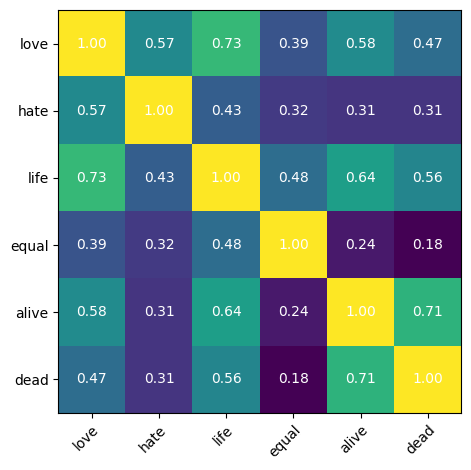

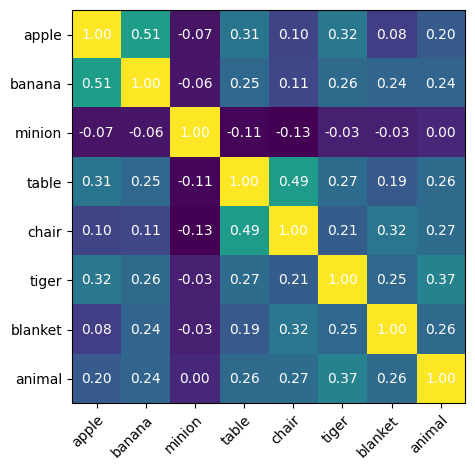

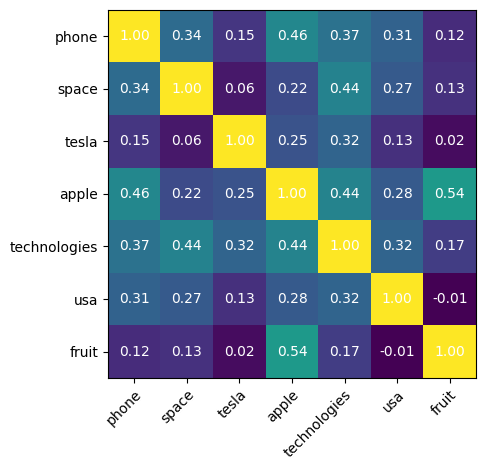

In [90]:
list_of_words = ['love', 'hate', 'life', 'equal', 'alive', 'dead']

similarity_matrix = np.zeros((len(list_of_words), len(list_of_words)), dtype=float)

### YOUR CODE HERE

similarity_matrix1 = calculate_similarity_table(list_of_words, glove_model)

list_words2 = ["apple", "banana", "minion", "table", "chair", "tiger", "blanket", "animal"]
similarity_matrix2 = calculate_similarity_table(list_words2, glove_model)

list_words3 = ["phone", "space", "tesla", "apple", "technologies", "usa", "fruit"]
similarity_matrix3 = calculate_similarity_table(list_words3, glove_model)


### YOUR CODE ENDS HERE

plot_similarity_matrix(similarity_matrix1, list_of_words)

plot_similarity_matrix(similarity_matrix2, list_words2)
plot_similarity_matrix(similarity_matrix3, list_words3)

In [91]:
#### YOUR CODE HERE

# As we can see, some strange results may occur. For instance, the words "alive" and "dead" can have a very high cosine similarity,
# which can be explained by their frequent co-occurrence as a pair in the same sentences. Since the glove model does not capture semantics 
# in the context of words meanings, but makes embedings by calculating statistics of word sequences and creating a co-occurrence matrix. 

# In general, it shows good results. For example, the words "apple," "technologies," and "phone" have a high similarity, 
# indicating that the model recognizes the Apple company’s connection to phone manufacturing and technologies.

### YOUR CODE ENDS HERE

<a name='e11'></a>
### Exercise 11: Other pre-trained word embeddings
(10p) For this exercise, experiment with at least one different word embedding model. You can choose Glove with different dimensions or other pre-trained models. Use the gensim library to download and use the models.
Plot similarity matrices between sets of words you used in the previous exercise and compare the results. Are there noticeable differences? Why (not)?

In [92]:
model = api.load("fasttext-wiki-news-subwords-300")

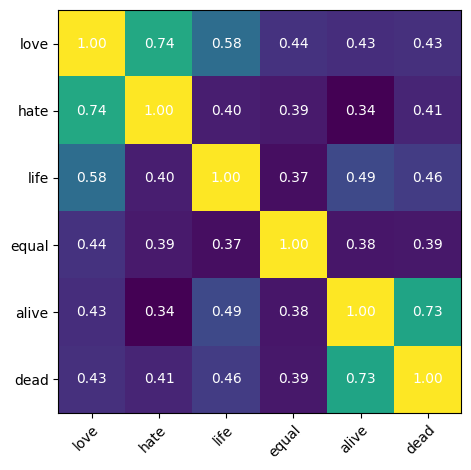

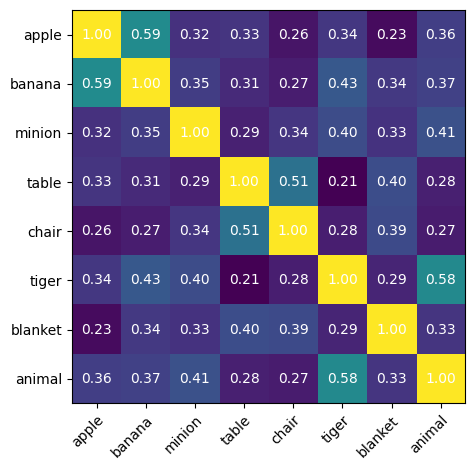

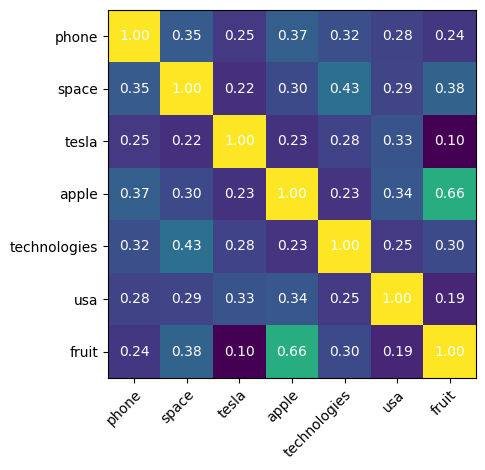

In [93]:
#### YOUR CODE HERE

list_of_words = ['love', 'hate', 'life', 'equal', 'alive', 'dead']

similarity_matrix = np.zeros((len(list_of_words), len(list_of_words)), dtype=float)


similarity_matrix1 = calculate_similarity_table(list_of_words, model)

list_words2 = ["apple", "banana", "minion", "table", "chair", "tiger", "blanket", "animal"]
similarity_matrix2 = calculate_similarity_table(list_words2, model)

list_words3 = ["phone", "space", "tesla", "apple", "technologies", "usa", "fruit"]
similarity_matrix3 = calculate_similarity_table(list_words3, model)


plot_similarity_matrix(similarity_matrix1, list_of_words)

plot_similarity_matrix(similarity_matrix2, list_words2)
plot_similarity_matrix(similarity_matrix3, list_words3)

### YOUR CODE ENDS HERE

In [94]:
# We can clearly observe that by using this pre-trained model, we still have the problem that some clearly opposite words have very high
# similarity ("apple" and "phone"). 

# Fasttext-wiki-news-subwords-300 embeding identifies "proximity" based on statistics of ngrams occurrences in the same or similar environments. It can capture 
# high similarity between certain words (e.g., "apple" and "phone") even though they seem conceptually opposite in some senses (apple as a fruit vs. phone as a device).

// your comments

## 5. Sentence Embeddings by Averaging Word Embeddings

Word embeddings are a powerful model for representing words and their meaning (in terms of distributional similarity). As we discussed in class, we can use them in a wide variety of tasks with more complex architectures. Word vectors offer a dense vector for each word. What if we wanted to represent a sentence (or a document) based on word vectors. How can we do that?

In the course, we will see different architectures that take into account the sequence of words (by combining their vectors). A first naive but simple and sometimes (as we are going to see) quite effective approach would be to represent a sentence with an embedding vector that is the average of the word vectors that form the sentence.

So formally, this is what we are aiming for:

$
\text{Sentence_Embedding} = \frac{1}{N} \sum_{i=1}^{N} \text{Word_Embedding}_i
$

where:
* $N$ is the number of words in a sentence
* $\text{Word_Embedding}_i$ is the word vector for the $i$-th in the sentence.

Things to note:
* The embedding vector for the sentence will obviously have the same dimension as the word embedding.
* This representation ignores the word order (like bag-of-words). During the course we will see how we can overcome this limitation by using sequence models.

<a name='e12'></a>
### Exercise 12: Sentence Embedding

(10p) Complete the function below that takes as input the sentence in the form of tokens (so it's a list of words) and calculates the sentence embedding vector. First, we would need to retrieve the word embeddings for each word from our loaded model and then average the vectors.

Note: There can be cases where all tokens from a sentence are out-of-vocabulary words (OOV). Think what to do in this case and make sure to discuss it in the report.

In [95]:
def embed_sentence_word_model(tokens, model):
    """
    Calculates the sentence embedding by averaging the embeddings of the tokens
    Args:
        tokens: a list of words from the sentence
        model: a trained word embeddings model

    Returns: a numpy array of the sentence embedding

    """
    #### YOUR CODE HERE
    #### CAUTION: be sure to cover the case where all tokens are out-of-vocabulary!!!
    vectors = []
    for token in tokens:
        if token in model.key_to_index:
            vectors.append(model[token])

    if len(vectors) == 0:
        return np.zeros(model.vector_size)


    return np.mean(vectors, axis=0)
    ### YOUR CODE ENDS HERE

Now we can apply the function to the whole dataset. Here we do it both for the sentence and the compressed version. You should know it by now, but this operation might take some time. The next cells will apply your function to the whole dataset.

In [96]:
def embed_sentence_word_model_dataset(example, model):
    """
    Embeds the sentence and the compressed sentence in the example from the Dataset
    Args:
        example: an example from the Dataset
        model: a trained word embeddings model

    Returns: updated example with 'sentence_embedding' and 'compressed_embedding' columns

    """
    sentence_tokens = example['sentence_tokens']
    clean_compressed = example['clean_compressed']
    compressed_tokens = tokenize(clean_compressed)

    sentence_embedding = embed_sentence_word_model(sentence_tokens, model)
    compressed_embedding = embed_sentence_word_model(compressed_tokens, model)

    example['sentence_embedding'] = sentence_embedding
    example['compressed_embedding'] = compressed_embedding
    return example

In [97]:
test_ds = test_ds.map(embed_sentence_word_model_dataset, fn_kwargs={'model': glove_model})
print(test_ds)

Map:   0%|          | 0/36000 [00:00<?, ? examples/s]

Dataset({
    features: ['set', 'clean_sentence', 'clean_compressed', 'sentence_tokens', 'compressed_tokens', 'sentence_bow', 'compressed_bow', 'sentence_embedding', 'compressed_embedding'],
    num_rows: 36000
})


In [98]:
for i in range(10):
    print(test_ds[i])

{'sentence_bow': array([0., 1., 0., ..., 0., 0., 0.]), 'compressed_bow': array([0., 0., 0., ..., 0., 0., 0.]), 'sentence_embedding': array([ 0.02453331,  0.14019701,  0.40209085, -0.46971211,  0.04033076,
        0.18894698,  0.30266726,  0.23533823, -0.51022846, -0.02097319,
        0.06425484, -0.05542472,  0.25127715, -0.02609646,  0.06118854,
       -0.14668901,  0.2933439 ,  0.32538292, -0.06103169,  0.29631716,
        0.18079489,  0.09402415,  0.2260948 ,  0.21759154,  0.32110819,
       -0.21264647, -0.11774247, -0.3546254 , -0.05950624, -0.25997856,
       -0.24597785,  0.36911014,  0.11414076,  0.06072923, -0.07174055,
        0.20637923, -0.24378215,  0.51089787, -0.33287662, -0.09516747,
       -0.02593537, -0.29986778,  0.30122846, -0.3545098 ,  0.18318513,
        0.13710238,  0.25542429, -0.48246539,  0.05040184, -0.74636614,
       -0.19993393, -0.15682769,  0.02851785,  0.85672534, -0.11560522,
       -2.38524365, -0.08730708, -0.18486176,  1.37883925,  0.49415493,
   

Here you can see that the new dataset returned a single numpy array containing all sentence embeddings in our dataset. This is a lot more efficient than returning a list of arrays (which is the default behaviour). Below we check the type and the dimensionality.

We will be using `text` subset from our dataset to not use too much RAM.

In [99]:
sent_embedding = test_ds['sentence_embedding']
compr_embedding = test_ds['compressed_embedding']
print(type(sent_embedding))
print(sent_embedding.shape)
print(type(compr_embedding))
print(compr_embedding.shape)

<class 'numpy.ndarray'>
(36000, 100)
<class 'numpy.ndarray'>
(36000, 100)


Next we try the condensed representatin based on a simple query. Feel free to try different queries with different words. What happens if we have OOV words in a query?

In [100]:
query = 'fox and deer'
print(query)

query_embedding = embed_text(query, clean, tokenize, lambda x: embed_sentence_word_model(x, glove_model))
print(query_embedding.shape)
print(query_embedding)

fox and deer
(100,)
[-7.9574332e-02 -3.4770331e-01  1.7729366e-01 -6.0485005e-01
  3.0022332e-02 -3.1933334e-01 -3.3017006e-02  3.8080001e-01
 -9.5549993e-02 -6.8293667e-01 -2.5135002e-01 -2.6160267e-01
  5.4243332e-01  4.8967004e-02  6.4244002e-01  1.4520667e-01
  1.6598998e-01  2.1143766e-01 -2.9778001e-01  3.7910333e-01
 -2.5491999e-02  3.0857334e-01  4.4262299e-01 -4.8366687e-03
  5.1693004e-01  6.1506337e-01 -1.6002001e-01 -1.9082667e-01
 -4.2462167e-01 -1.7103335e-02  9.1679998e-02  5.4518598e-01
  2.2566617e-03  4.1771331e-01  2.9497001e-01  2.8101999e-01
 -2.5762668e-02  2.4963665e-01  3.6236334e-01  2.3719667e-01
 -2.1890998e-01 -2.1570998e-01 -4.9093699e-01  1.8930303e-01
 -2.2870134e-01  2.5945336e-02  2.1237333e-01 -3.5905001e-01
  1.7600060e-03 -3.3630332e-01 -6.9356328e-01 -1.8233334e-01
  9.2886640e-03  9.2804670e-01 -2.8199133e-01 -1.7956600e+00
 -1.0166732e-01  2.3830002e-02  7.7983665e-01  2.9350668e-01
 -4.9146999e-02  7.9245996e-01  3.5156965e-01  2.4036676e-02
  1.

In [101]:
query = 'fortnite'
print(query)

query_embedding = embed_text(query, clean, tokenize, lambda x: embed_sentence_word_model(x, glove_model))
print(query_embedding.shape)
print(query_embedding)

fortnite
(100,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]


<a name='e13'></a>
### Exercise 13: Analyze sentence embeddings
- (5p) Calculate similarity between the word embeddings representations of the selected queries and the dataset sentences.
- (5p) Analyze the search results. Does the search work as expected? Discuss the results.
- (5p) Compare the results with the ones you got with the bag-of-words and TF-IDF representation. Discuss the differences and similarities.

In [102]:
### YOUR CODE HERE
def perform_search_embeddings(query, num_results=5, model=glove_model):
    
    
    embedded_query = embed_text(query, clean, tokenize, lambda x: embed_sentence_word_model(x, model))
    
    query_similarity_embed = cosine_similarity_1_to_n(embedded_query, sent_embedding)

    
    query_similarity_embed = np.nan_to_num(query_similarity_embed)

    
    top_indices_embed = top_k_indices(query_similarity_embed, k=num_results).tolist()

    
    
    for idx in top_indices_embed:
        similarity_score = query_similarity_embed[idx]
        original_sentence = split_ds['test'][idx]['set'][0] 
        print(f"Similarity: {similarity_score} - {original_sentence}")
    



### YOUR CODE ENDS HERE

In [103]:
queries_to_test = [
    'fox and deer',
    'Chinese planes',
    'china airlines',
    'reply',
    'respond',
    'asian Elephant',
    'Zosel Dam Lake Osoyoos',
    'preventive',
    'blood pressure'
]



for q in queries_to_test:
    print(f"########## Query: '{q}' ##########\n")
    if q == 'reply':
        num_results = 10
    else:
        num_results = 5
    print("BOW")
    
    sentences_bows_test_for_search = test_ds['sentence_bow']
    embedded_query_bow = embed_text(q, clean, tokenize, lambda x: bag_of_words(x, token_to_id))
    
    query_similarity_bow = cosine_similarity_1_to_n(embedded_query_bow, sentences_bows_test_for_search)
    query_similarity_bow = np.nan_to_num(query_similarity_bow) # Handle NaNs
    top_indices_bow = top_k_indices(query_similarity_bow, k=num_results).tolist()
    for idx in top_indices_bow:
        similarity_score = query_similarity_bow[idx]
        original_sentence = split_ds['test'][idx]['set'][0]
        print(f"Similarity: {similarity_score:.4f} - {original_sentence}")
    print("-" * (len(q) + 28)) # Separator

    # TF-IDF Search
    print("TF-IDF")
    embedded_query_tfidf = embed_query_tfidf(q, clean, tokenize, token_to_id, idf)
   
    
    query_similarity_tfidf = cosine_similarity_1_to_n(embedded_query_tfidf, sentences_tfidf_test)
    query_similarity_tfidf = np.nan_to_num(query_similarity_tfidf) # Handle NaNs
    top_indices_tfidf = top_k_indices(query_similarity_tfidf, k=num_results).tolist()
    for idx in top_indices_tfidf:
        similarity_score = query_similarity_tfidf[idx]
        original_sentence = split_ds['test'][idx]['set'][0]
        print(f"Similarity: {similarity_score:.4f} - {original_sentence}")
    print("-" * (len(q) + 28))


    print("Word Embedding")
    perform_search_embeddings(q, num_results=num_results, model=glove_model)

    print("\n" + "="*60 + "\n")


########## Query: 'fox and deer' ##########

BOW
Similarity: 0.4082 - CW INDUSTRIES High density rectangular connector with enhanced retention and solderability, meets the requirements of MIL-DTL-28804 and NAVSEA 3164341 and 3164342 specifications.
Similarity: 0.4082 - ``The Sensex has supports at 17,520 and 17,380 and resistances at 17,710 and 17,830. The Nifty has supports at 5,300 and 5,270 and resistances at 5,370 and 5,400,`` it added.
Similarity: 0.3965 - Heide and Cook Ltd. is restructuring its business to focus on heating, ventilation and air conditioning services, and CFO and Executive Vice President Dexter Kekua is retiring and will not be replaced.
Similarity: 0.3849 - Singapore and Australia reaffirmed on Monday to enhance bilateral ties and strengthen cooperation on regional and international political, economic and security developments.
Similarity: 0.3825 - Chinese ambassador to Australia Zhang Junsai on Tuesday called for broader and further cooperation between China an

/var/folders/fp/bqd9m9ln4sn4w0xn9dg147tc0000gn/T/ipykernel_37062/2851269352.py:17: RuntimeWarning: invalid value encountered in divide
  similarities_vector = dot_product/(norm_vector*norms_others)


Similarity: 0.0000 - Two-time world champion Fernando Alonso on Saturday boosted his hopes of claiming his third victory at the Monaco Grand Prix when he topped the times in final free practice for Sunday's race.
Similarity: 0.0000 - Barclays is launching two new savings accounts including a best buy cash ISA paying 3.55% gross/3.61% AER interest to help customers make the most of their tax-free savings allowance.
Similarity: 0.0000 - A minor died in a road accident at Dulegauda in Tanahu district on Tuesday.
Similarity: 0.0000 - The Samsung Galaxy S4 will be available to pre-order from TalkTalk from Monday, ready for its release on April 26.
Similarity: 0.0000 - Actress Evelyn Keyes, who played Scarlett O'Hara's younger sister in ``Gone With the Wind,'' has died at age 91.
--------------------------------------
TF-IDF
Similarity: 0.0000 - Two-time world champion Fernando Alonso on Saturday boosted his hopes of claiming his third victory at the Monaco Grand Prix when he topped the time

### Interpretation of results

### Results and comparison
As I found 9 useful examples in BOW and TF-IDF, here I am going to just go over them and describe how well does the Sentence embedding algorithm tackle them and what is the difference with BOW and TF-IDF.

1)  **fox and deer**: Sentence Embedding performs worse than TF-IDF. It finds sentences about deer or hunting but completely misses the "fox" component. The averaging seems to lose the specific meaning of the combination and defaults to the general topic of animals or just "deer". BOW was irrelevant, TF-IDF found sentences with either word.
2)  **Chinese planes**: Sentence Embedding performs better semantically than both BOW and TF-IDF. It consistently finds results related to the topic of aviation (planes, jets, helicopters, flights), often including relevant airlines, even if "Chinese" isn't the main focus. BOW focused only on "Chinese", and TF-IDF found some plane results but less topically consistent.
3)  **china airlines**: Here Sentence Embedding performs very well, arguably better than BOW and TF-IDF, even though it doesn't put the most relevant answer on the first place. Interesting thing here is that it considered Dragonair from Hong-Kong to be more related to the query than sentences with literal phrases 'China airlines'. So it captured the concept well, not just exact word matches.
4)  **reply**: Sentence Embedding shows mixed results. It finds some exact matches like BOW and TF_IDF, but also retrieves sentences with related meanings ("resignation", "tweeted", "deny"). It shows semantic understanding but loses the precision for the exact keyword compared to BOW/TF-IDF, and introduces some noise. So, the first results that it finds don't have exact word 'reply'. Here I should highlight that searching for just one word like that might not be the best idea.
5)  **respond**: We need this just to compare, so skipping.
6)  **asian Elephant**: Sentence Embedding performs alright semantically. It captures the combined concept, finding results about Asian/Sumatran elephants, baby elephants, and related topics like poaching. The first result is exactly abpit asian elephants, unlike in other 2 methods. Nevertheless, the sentence 'The San Diego Zoo is loaning two female Asian elephants to the Los Angeles Zoo for its new $42-million Elephants of Asia exhibit set to open in mid-December, officials at the two zoos announced Friday.' is not found by this algorithm due to big length (as we remember we just average the similarity with every word), so we can conclude that this exact model has troubles with big sentences with a lot of words.
7)  **Zosel Dam Lake Osoyoos**: Sentence Embedding performs much worse than BOW/TF-IDF. The results are generic about dams and lakes completely losing the specific names, because "Zosel" and "Osoyoos" are oov for Glove. Averaging defaults to the common words. BOW/TF-IDF rely on lexical matching and would be better here if the terms are in their vocabulary. So, it is bad for finding specific names. 
8)  **preventive**: Sentence Embedding performs significantly better. While BOW/TF-IDF found nothing (there was an error due to vector being zero), embeddings found relevant sentences about preventive medicine. This shows its strength in using semantic context to find meaning even for less common words which are not in the corpus we made out of training subset.
9)  **blood pressure**: Sentence Embedding performs not quite good for that one, just as previous algorithms. Even though it finds semantically related sentences (unlike some of the results of previous algorithms that just retrieved sentences where 'blood' word has multiple occurrences) about the medicine, it doesn't find specific phrase as 'blood pressure'. That is the limitation of this approach as we are treating words separately here. 

Overall, Sentence Embeddings (using averaging) clearly perform differently by focusing on meaning over exact words. It excels in understanding topics and synonyms where BOW/TF-IDF fail. However, the simple averaging technique causes problems with specific phrases, oov words and sometimes leads to irrelevant results. **Taking these facts into consideration, while promising for semantic tasks, this simple averaging method isn't consistently better than TF-IDF for this specific retrieval task*
 where lexical overlap is often important and specific terms can be OOV.

## 6. Evaluating Retrieval

In this last section we will try to evaluate how good our sentence retrieval system is. To keep the computational resources manageable, we will use the test set for that as its size is more manageable.

Recall from the lecture in IR that there are several metrics to evaluate retrieval performance by taking into account the relevance of the retrieved results to the query. We will use Recall@K here (for more metrics and more details refer to the lecture slides and the textbooks).

RRecall@K is a metric used to measure the effectiveness of a search system in retrieving relevant documents within the top $K$ retrieved documents. It calculates the proportion of relevant documents retrieved within the top-$K$ results, compared to the total number of relevant documents in the collection.

$
\text{Recall@K} = \frac{\text{Number of relevant documents retrieved in the top }-K}{\text{Total number of relevant documents}}
$

In our case, we have a sentence, and it's compressed version. To test our system, we will treat compressed sentences as the queries. Each query will have only a single relevant sentence - the corresponding uncompressed sentence.

Therefore, for the calculation of Recall@K we will take into account whether the correct retrieved result is contained within the first $K$ retrieved results. For example, if for a query (i.e. a compressed sentence) we retrieve 10 results and within these we see the relevant one (i.e. the full sentence), then Recall@10 = 1.

<a name='e14'></a>
### Exercise 14: Cosine similarity between two sets of vectors

(3p) In this exercise you will revisit your implementation of the cosine similarity. Generalize it so that it can accept two arrays containing two sets of vectors (first one containing $M$ vectors and the second one $N$ vectors). Compute the cosine similarity between each pair of vectors coming from the two sets. The result should be an array of size $M x N$.

Once again, try to write an efficient code. This means no loops. Remember the relation between matrix multiplication and dot product. (Depending on your implementation of the previous function calculating cosine similarity, this one can be almost the same)

In [104]:
def cosine_similarity_m_to_n(vectors, other_vectors):
    """
    Calculates the cosine similarity between a multiple vectors and other vectors.
    Args:
        vectors: a numpy array representing M number of vectors of D dimensions (of the size MxD)
        other_vectors: a 2D numpy array representing other vectors (of the size NxD, where N is the number of vectors and D is their dimension)

    Returns: a numpy array of cosine similarity between all the vectors and all the other vectors

    """

    #### YOUR CODE HERE

    dot_product = np.dot(vectors, other_vectors.T) # M x N matrix
    norms_others = np.linalg.norm(other_vectors, axis=1).reshape(1, -1) #shape(1, N)
    norm_vector = np.linalg.norm(vectors, axis = 1).reshape(-1, 1) # shape (M, 1)

    similarities_vector = dot_product/(norm_vector*norms_others)

    return similarities_vector


    ### YOUR CODE ENDS HERE

The following function will use your implementation to calculate Recall@K based on the similarity matrix.

In [105]:
def calculate_recall(queries, sentences, k, batch_size=1000):
    """
    Calculates recall@k given the embeddings of the queries and sentences.
    Assumes that only a single sentence with the same index as query is relevant.
    Batching is implemented to avoid high memory usage.
    Args:
        queries: a numpy array with the embeddings of N queries
        sentences: a numpy array with the embeddings of N sentences available for retrieval
        k: number of top results to search for the relevant sentence
        batch_size: number of queries to process at a time

    Returns: calculated recall@k

    """
    n_queries = queries.shape[0]
    correct = np.zeros(n_queries, dtype=bool)

    with tqdm.tqdm(total=n_queries) as pbar:
        for batch_start in range(0, n_queries, batch_size):
            batch_end = min(batch_start + batch_size, n_queries)
            queries_batch = queries[batch_start:batch_end]
            batch_similarity = cosine_similarity_m_to_n(queries_batch, sentences)

            for i, similarity_row in enumerate(batch_similarity):
                query_index = batch_start + i
                top_k = top_k_indices(similarity_row, k=k, sorted=False)

                if query_index in top_k:
                    correct[query_index] = True

                pbar.update(1)

    recall = np.sum(correct) / n_queries
    return recall

You can use it like so:

In [106]:
recall_at_1 = calculate_recall(compr_embedding, sent_embedding, k=1, batch_size=1000)
print(f'\n{recall_at_1 * 100:.2f}%')

100%|██████████| 36000/36000 [00:13<00:00, 2585.58it/s]


55.24%


<a name='e15'></a>
### Exercise 15: Evaluating retrieval methods

(10p) Calculate recall for different values of $K$ for all methods:
- BOW,
- TF-IDF,
- Pre-trained embeddings.

Discuss the results.
Comment on how recall changes based on the value of $K$. Are the results expected or surprising?

In [107]:
def calculate_recall_tfidf(queries, sentences, k, batch_size=1000):
    
    n_queries = queries.shape[0]
    correct = np.zeros(n_queries, dtype=bool)

    with tqdm.tqdm(total=n_queries) as pbar:
        for batch_start in range(0, n_queries, batch_size):
            batch_end = min(batch_start + batch_size, n_queries)
            queries_batch = queries[batch_start:batch_end]
            batch_similarity = cosine_similarity_m_to_n(queries_batch, sentences)

            for i, similarity_row in enumerate(batch_similarity):
                query_index = batch_start + i
                top_k = top_k_indices(similarity_row, k=k, sorted=False)

                if query_index in top_k:
                    correct[query_index] = True

                pbar.update(1)

    recall = np.sum(correct) / n_queries
    return recall

In [108]:
#### YOUR CODE HERE

k_values = [5,10,15,20,25]
recalls_bow = []
recalls_embed = []
recalls_tfidf = []

for n in  k_values:
    recall_bow = calculate_recall(test_ds['compressed_bow'], test_ds['sentence_bow'], k=n, batch_size=1000)
    recall_model = calculate_recall(test_ds["compressed_embedding"], test_ds["sentence_embedding"], k=n, batch_size=1000)
    recall_tf_idf = calculate_recall_tfidf(compressed_tfidf_test, sentences_tfidf_test, k=n, batch_size=1000) 
    # TODO:need to create for the tf_idf
    print(f"Recall@{n} (TF-IDF): {recall_tf_idf * 100:.2f}%")

    print(f"Recall@{n} (BOW): {recall_bow * 100:.2f}%")
    # print(f"Recall@{n} (TF-IDF): {recall_tf_idf * 100:.2f}%")
    print(f"Recall@{n} (Embeddings): {recall_model * 100:.2f}%")
    recalls_bow.append(recall_bow)
    recalls_embed.append(recall_model)
    recalls_tfidf.append(recall_tf_idf)
    # recalls_tfidf.append(recall_tf_idf)



### YOUR CODE ENDS HERE

  8%|▊         | 2950/36000 [00:11<01:24, 389.96it/s]/var/folders/fp/bqd9m9ln4sn4w0xn9dg147tc0000gn/T/ipykernel_37062/3952638300.py:18: RuntimeWarning: invalid value encountered in divide
  similarities_vector = dot_product/(norm_vector*norms_others)
100%|██████████| 36000/36000 [02:10<00:00, 275.86it/s]


Recall@5 (TF-IDF): 95.19%
Recall@5 (BOW): 89.77%
Recall@5 (Embeddings): 72.01%


100%|██████████| 36000/36000 [02:08<00:00, 280.42it/s]


Recall@10 (TF-IDF): 97.00%
Recall@10 (BOW): 92.35%
Recall@10 (Embeddings): 77.80%


100%|██████████| 36000/36000 [02:08<00:00, 279.39it/s]


Recall@15 (TF-IDF): 97.69%
Recall@15 (BOW): 93.63%
Recall@15 (Embeddings): 80.82%


100%|██████████| 36000/36000 [02:08<00:00, 279.50it/s]


Recall@20 (TF-IDF): 97.98%
Recall@20 (BOW): 94.43%
Recall@20 (Embeddings): 82.90%


100%|██████████| 36000/36000 [02:08<00:00, 280.38it/s]

Recall@25 (TF-IDF): 98.28%
Recall@25 (BOW): 94.87%
Recall@25 (Embeddings): 84.39%


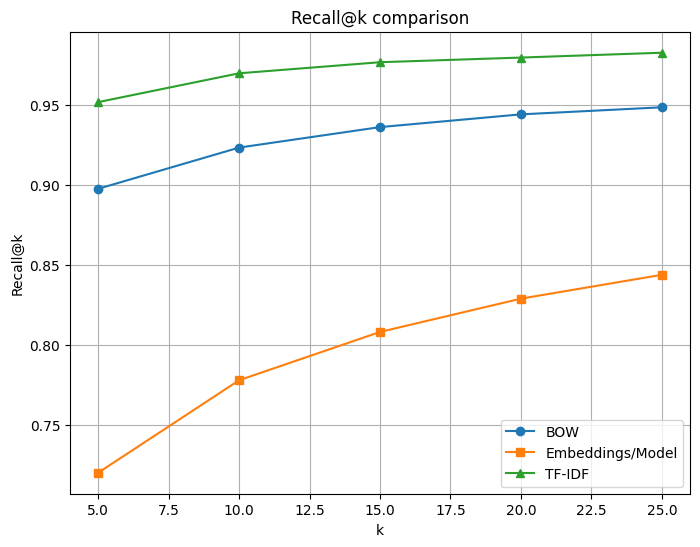

In [109]:
plt.figure(figsize=(8, 6))
plt.plot(k_values, recalls_bow, marker='o', label='BOW')
plt.plot(k_values, recalls_embed, marker='s', label='Embeddings/Model')
plt.plot(k_values, recalls_tfidf, marker='^', label='TF-IDF')
# plt.plot(k_values, recalls_tfidf, marker='x', label='tf-idf')

plt.xlabel('k')
plt.ylabel('Recall@k')
plt.title('Recall@k comparison')
plt.legend()
plt.grid(True)
plt.show()

<a name='e16'></a>
### Exercise 16: Improving retrieval

(10p) Imagine that you work at a company and are tasked with delivering the best retrieval method. Select the most promising one and try to improve the scores (e.g. by changing the vocab size, loading different model, etc.).
Discuss the results you achieve, even if you didn't manage to improve the scores.

In [110]:
test_ds

Dataset({
    features: ['set', 'clean_sentence', 'clean_compressed', 'sentence_tokens', 'compressed_tokens', 'sentence_bow', 'compressed_bow', 'sentence_embedding', 'compressed_embedding'],
    num_rows: 36000
})

In [114]:
#### YOUR CODE HERE

import torch
from transformers import AutoTokenizer, AutoModel
from sklearn.metrics.pairwise import cosine_similarity

model_name = 'sentence-transformers/all-MiniLM-L6-v2'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

def mean_pooling(model_output, attention_mask):
    token_embeddings = model_output[0] 
    input_mask_expanded = attention_mask.unsqueeze(-1).expand(token_embeddings.size()).float()
    sum_embeddings = torch.sum(token_embeddings * input_mask_expanded, 1)
    sum_mask = torch.clamp(input_mask_expanded.sum(1), min=1e-9)
    mean_pooled = sum_embeddings / sum_mask
    return mean_pooled.cpu().detach().numpy()

def generate_sentence_embedding(sentence, tokenizer, model):
    encoded_input = tokenizer(sentence, padding=True, truncation=True, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**encoded_input)
    sentence_embeddings = mean_pooling(model_output, encoded_input['attention_mask'])
    return sentence_embeddings.flatten()

def embed_dataset(dataset, tokenizer, model, batch_size=1000):
    sentence_embeddings = []
    num_sentences = len(dataset)

    with tqdm.tqdm(total=num_sentences, desc="Embedding sentences") as pbar:
        for i in range(0, num_sentences, batch_size):
            batch = dataset['sentence_tokens'][i:i + batch_size]
            sentences = [" ".join(tokens) for tokens in batch]
            embeddings = []
            for sentence in sentences:
                embeddings.append(generate_sentence_embedding(sentence, tokenizer, model))
            sentence_embeddings.extend(embeddings)
            pbar.update(len(sentences))
    return np.array(sentence_embeddings)


def perform_search_improved(query, sentence_embeddings, sentences_text, tokenizer, model, num_results=5):
    query_embedding = generate_sentence_embedding(query, tokenizer, model)
    similarities = cosine_similarity(query_embedding.reshape(1, -1), sentence_embeddings)[0]
    top_indices = np.argsort(similarities)[::-1][:num_results]
    for idx in top_indices:
        print(f"Similarity: {similarities[idx]:.4f} - Sentence: {sentences_text['set'][idx]}")



tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

In [115]:

sentences_embedding = embed_dataset(test_ds, tokenizer, model)
sentences = test_ds


Embedding sentences: 100%|██████████| 36000/36000 [04:15<00:00, 140.92it/s]


In [116]:
queries = [
   
    'homeless person',
    'government activity',
    'new expansion',
    'market trends'
]

for query in queries:
    print(f"Query: {query}\\n")
    perform_search_improved(query, sentences_embedding, sentences, tokenizer, model, num_results=5)
    print("="*50 + "\\n")

### YOUR CODE ENDS HERE

Query: homeless person\n
Similarity: 0.6828 - Sentence: ['A 53-year-old homeless man has gone missing.', 'Homeless man goes missing']
Similarity: 0.5331 - Sentence: ["A homeless woman who sneaked into a man's house and lived undetected in his closet for a year was arrested in Japan after he became suspicious when food mysteriously began disappearing.", "Woman lived in man's closet for a year"]
Similarity: 0.5094 - Sentence: ['A homeless man burned to death trying to stay warm overnight in the storm.', 'Homeless man burns to death']
Similarity: 0.4870 - Sentence: ['A homeless man was found dead yesterday in a wooded area near Hicksville, a Nassau official said, the third homeless man discovered dead outside in a week marked by frigid temperatures and stormy weather.', 'Another homeless man found dead, near Hicksville']
Similarity: 0.4739 - Sentence: ['A homeless man was found stabbed to death early yesterday morning in a parking lot, police said.', 'Homeless man found stabbed to death']

// your comments

### Improvements

##### Formulation of the task
If we consider some real task to retrieve information then of course we usually will retrieve it with some specific phrases or whole sentences and not just words, so some of our previous examples for testing will be exlucded.

##### Modelling
We obviously want to stick to embeddings, because retrieving semantically close things is the most important part of any search and other methods can not offer that.
If one wants to perform a normal search on that kind of data, we will need a sentence embedder (real sentence embedder, not just word embedder with averaging), because we are working exactly with sentences. It will let us extract a normal semantics from sentences and we don't have to worry about the number of words, etc. - it is not an important factor in sentence embeddings. As such an embedding we selected 'sentence-transformers/all-MiniLM-L6-v2' because it is light and perfomative. (https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2). It maps sentences & paragraphs to a 384 dimensional dense vector space and can be used for tasks like semantic search. We will not change the method to compare similar sentences because cosine similarity is the easiest and is really effective and interpretable. 

### Interpreation of results
Above you can see that, if we, for example, are trying to look up news about certain topics or regarding certain phenomenas, it works perfectly, every query gets exactly what requires from it. Now let's try our examples from pervious exercices. 


In [117]:
queries = [
    'fox and deer',
    'Chinese planes',
    'china airlines',
    'asian Elephant',
    'Zosel Dam Lake Osoyoos',
    'blood pressure'
]

for query in queries:
    print(f"Query: {query}\\n")
    perform_search_improved(query, sentences_embedding, sentences, tokenizer, model, num_results=5)
    print("="*50 + "\\n")

Query: fox and deer\n
Similarity: 0.5067 - Sentence: ['The body of a rabid fox was found in the Pleasant Point area of the city last week.', 'Body of rabid fox found']
Similarity: 0.4823 - Sentence: ['A primary school class in the US learned first hand about animal behaviour when a deer crashed through a window and into its classroom.', 'Deer crashes into classroom']
Similarity: 0.4635 - Sentence: ['BUTTE, Mont. A 61-year-old woman got into a tussle with an aggressive deer after it attacked one of her poodles at her home on Monday.', 'Woman gets into tussle with an aggressive deer']
Similarity: 0.4632 - Sentence: ['This is good news for badgers, cows, dairy farmers and animal-lovers alike.', "RSPCA: 'this is good news for badgers'"]
Similarity: 0.4565 - Sentence: ["It's deer hunting season, and that means some lucky hunters will bring home venison.", "It's deer hunting season:"]
==================================================\n
Query: Chinese planes\n
Similarity: 0.5665 - Sentence: 

1) fox and deer: Sentence Embedding performs well. It retrieves sentences explicitly about a "fox" and a "deer" separately within the top results, along with other animal-related sentences ("badgers", "cows"). While it understands the individual concepts well, it doesn't strictly enforce the co-occurrence of both "fox" and "deer" in the very top hits as strongly as a lexical search might aim for. It avoids being misled by common words like BOW and offers more thematic relevance than TF-IDF which might just match individual terms.
2) Chinese planes: Sentence Embedding performs excellently, clearly understanding the core topic. All top results are directly relevant, mentioning China/Chinese alongside aviation terms like "aircraft", "jets", and specific airlines. This semantic understanding is far superior to BOW  and TF-IDF.
3) china airlines: Here Sentence Embedding performs excellently. It retrieves results explicitly mentioning "China Eastern Airlines" and "Air China", as well as related contexts like Airbus deals in China. Its ability to understand the context and specific entities surpasses the keyword based limitations of the previous methods.
4) asian Elephant: Sentence Embedding performs quite well semantically. It retrieves sentences about "Sumatran elephant" and "Borneo pygmy elephant", capturing the "elephant" theme and relevant geographical context (which are Asian regions). This is more nuanced than BOW/TF-IDF which would rely on exact term matches. It successfully identifies the core concept, but it didn'f put the most obvious and related result on the first place. 
5) Zosel Dam Lake Osoyoos: Sentence Embedding achieves outstanding performance here, retrieving the exact matching sentence as the top result. Subsequent results are thematically related to dams and lakes. This is a significant improvement over glove averaging (which failed due to oov) and demonstrates the transformer's ability (possibly via subword tokenization) to handle specific named entities better than expected for a purely semantic model, outperforming BOW or TF-IDF in this specific instance.
6) blood pressure: Sentence Embedding performs well, retrieving sentences that explicitly mention "blood pressure" and closely related medical concepts like "hypertension" and relevant studies. It understands the combined concept, unlike BOW/TF-IDF which might have focused on individual word occurrences.